# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample: China (^HSCE)

In [120]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [121]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Reading the datas (Source: Yahoo Finance)**

In [122]:
getSymbols("^HSCE", from = '2000-01-01', to = '2021-10-31') 

Warning message:
“^HSCE contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "^HSCE"

**Checking data frequency**

In [123]:
periodicity(HSCE)        

Daily periodicity from 2000-01-03 to 2021-10-29 

**Identifying missing values (%)**

In [124]:
round(prop.table(table(is.na(HSCE)))*100, digits = 2)       


FALSE  TRUE 
97.84  2.16 

**Removing missing values**

In [125]:
HSCE <- na.omit(HSCE)    
round(prop.table(table(is.na(HSCE)))*100, digits = 2)         


FALSE 
  100 

**Removing unnecessary features**

In [126]:
HSCE.df <- HSCE[,'HSCE.Close']                              
head(HSCE.df)

           HSCE.Close
2000-01-03    1999.99
2000-01-04    2082.93
2000-01-05    1956.57
2000-01-06    1904.20
2000-01-07    2004.51
2000-01-10    2061.00

**Calculating log-returns**

In [127]:
logreturn <- diff(log(HSCE.df$HSCE.Close))*100                     
head(logreturn)

           HSCE.Close
2000-01-03         NA
2000-01-04   4.063335
2000-01-05  -6.258261
2000-01-06  -2.713097
2000-01-07   5.133770
2000-01-10   2.779166

**Aggregating the data**

In [128]:
HSCE.df$HSCE.Return <- logreturn                  
HSCE.df <- na.omit(HSCE.df)
head(HSCE.df)

           HSCE.Close HSCE.Return
2000-01-04    2082.93    4.063335
2000-01-05    1956.57   -6.258261
2000-01-06    1904.20   -2.713097
2000-01-07    2004.51    5.133770
2000-01-10    2061.00    2.779166
2000-01-11    1996.30   -3.189581

**Identifying missing values (%)**

In [129]:
round(prop.table(table(is.na(HSCE.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [130]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Price & Return charts**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



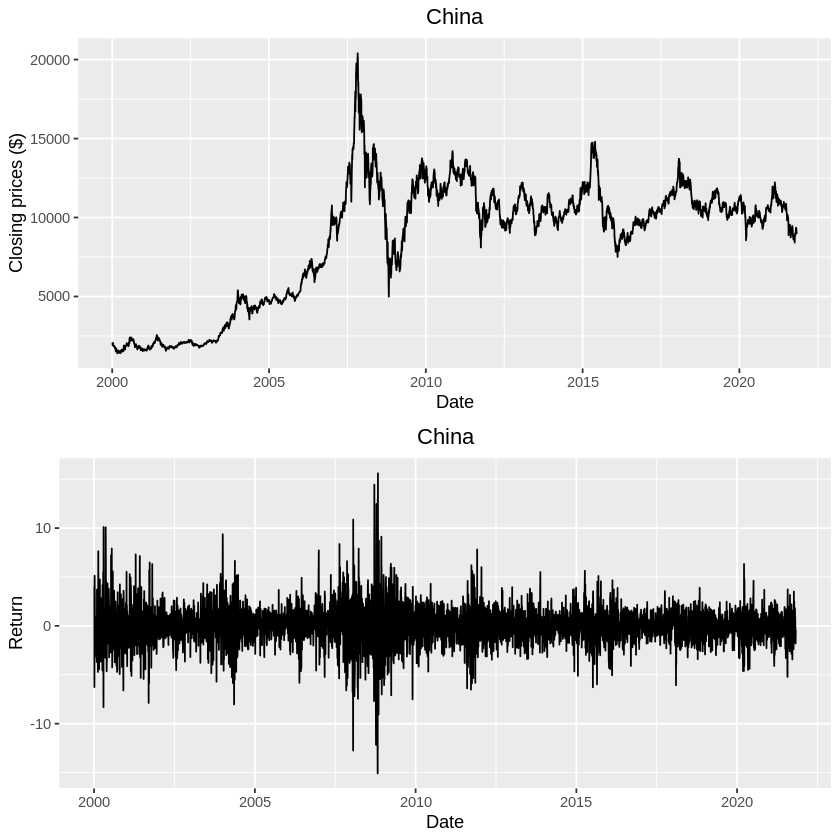

In [131]:
# Price chart
graph1 <- ggplot(HSCE.df,
                aes(x = index(HSCE.df), y = HSCE.df[,'HSCE.Close'])) +
                geom_line(color = "black") +
                ggtitle("China") +
                xlab("Date") +
                ylab("Closing prices ($)") +
                theme(plot.title = element_text(hjust = 0.5))

# Return chart
graph2 <- ggplot(HSCE.df,
                aes(x = index(HSCE.df), y = HSCE.df[,'HSCE.Return'])) +
                geom_line(color = "black") +
                ggtitle("China") +
                xlab("Date") +
                ylab("Return") +
                theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1, graph2, ncol = 1, nrow = 2)

## 3. Descriptive statistic

In [132]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Descriptive statistic**

In [133]:
# mean
round(mean(HSCE.df$HSCE.Return), 3)                         

[1] 0.028

In [134]:
# sd
round(sd(HSCE.df$HSCE.Return), 3)                           

[1] 1.883

In [135]:
# skewness
round(skewness(HSCE.df$HSCE.Return), 3)                     

[1] 0.069

In [136]:
# kurtosis
round(kurtosis(HSCE.df$HSCE.Return), 3)                     

[1] 6.136

In [137]:
# min
round(min(HSCE.df$HSCE.Return), 3)                          

[1] -15.087

In [138]:
# p5
round(quantile(HSCE.df$HSCE.Return, probs = 0.05), 3)       

5% 
-2.924

In [139]:
# p25
round(quantile(HSCE.df$HSCE.Return, probs = 0.25), 3)       

25% 
-0.89

In [140]:
# median
round(median(HSCE.df$HSCE.Return), 3)                       

[1] 0.041

In [141]:
# p75
round(quantile(HSCE.df$HSCE.Return, probs = 0.75), 3)       

75% 
1.006

In [142]:
# p95
round(quantile(HSCE.df$HSCE.Return, probs = 0.95), 3)       

95% 
2.795

In [143]:
# max
round(max(HSCE.df$HSCE.Return), 3)                          

[1] 15.606

In [144]:
# n observations
length(HSCE.df$HSCE.Return)                                 

[1] 5341

## 4. Series normality analysis

In [145]:
# Package
library(tseries)

In [146]:
jarque.bera.test(HSCE.df$HSCE.Return)


	Jarque Bera Test

data:  HSCE.df$HSCE.Return
X-squared = 8382.6, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [147]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

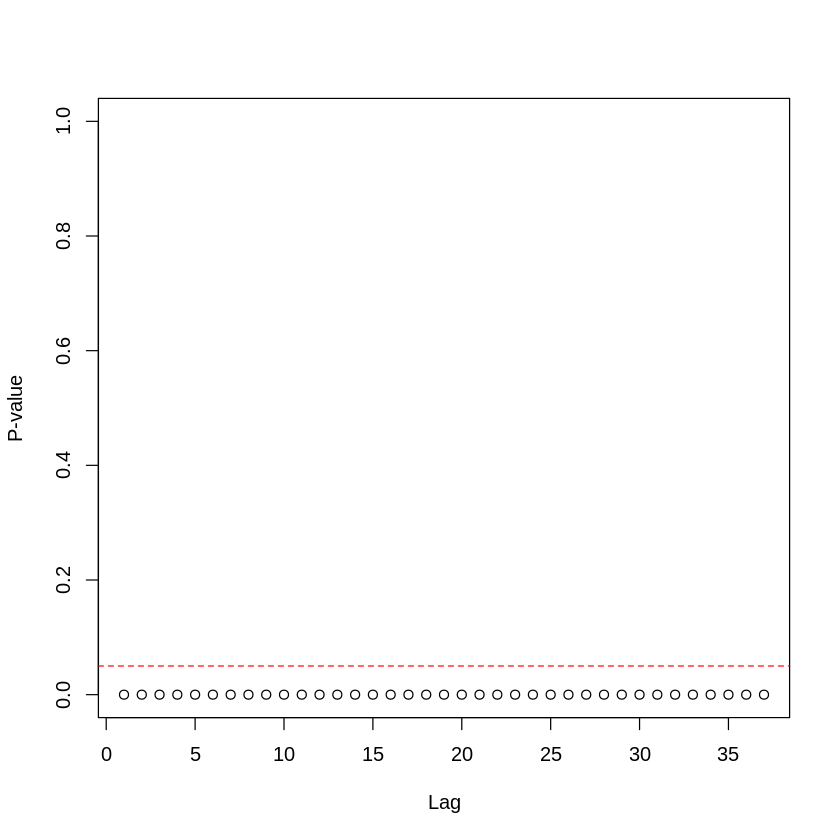

In [148]:
McLeod.Li.test(y = HSCE.df$HSCE.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [149]:
ArchTest(HSCE.df$HSCE.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  HSCE.df$HSCE.Return
Chi-squared = 1191.7, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [150]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [151]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [152]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [153]:
# Estimation
garch.fit <- ugarchfit(spec = garch.spec, data = HSCE.df$HSCE.Return)
round(garch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0430,0.0193,2.2296,0.0258
omega,0.0307,0.0068,4.4974,0.0000
alpha1,0.0696,0.0074,9.4111,0.0000
beta1,0.9211,0.0084,109.2169,0.0000
skew,0.9665,0.0163,59.1446,0.0000


In [154]:
# Extracting variance series from the Linear GARCH model
var.garch <- ts(garch.fit@fit$sigma^2)
head(var.garch)

HSCE.df$HSCE.VolGARCH <- as.numeric(var.garch)
head(HSCE.df)

A Time Series:
[1] 3.545198 4.420381 6.863968 6.881529 8.171850 8.078617

           HSCE.Close HSCE.Return HSCE.VolGARCH
2000-01-04    2082.93    4.063335      3.545198
2000-01-05    1956.57   -6.258261      4.420381
2000-01-06    1904.20   -2.713097      6.863968
2000-01-07    2004.51    5.133770      6.881529
2000-01-10    2061.00    2.779166      8.171850
2000-01-11    1996.30   -3.189581      8.078617

**EGARCH model**

In [155]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [156]:
# Estimation
egarch.fit <- ugarchfit(spec = egarch.spec, data = HSCE.df$HSCE.Return)
round(egarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0260,0.0160,1.6190,0.1054
omega,0.0185,0.0018,10.1996,0.0000
alpha1,-0.0212,0.0061,-3.4730,0.0005
beta1,0.9857,0.0009,1111.2095,0.0000
gamma1,0.1596,0.0129,12.3841,0.0000
skew,0.9769,0.0165,59.2262,0.0000


In [157]:
# Extracting variance series from the EGARCH model
var.egarch <- ts(egarch.fit@fit$sigma^2)
head(var.egarch)

HSCE.df$HSCE.VolEGARCH <- as.numeric(var.egarch)
head(HSCE.df)

A Time Series:
[1] 3.544979 4.201116 6.424192 6.820387 7.801167 7.786976

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH
2000-01-04    2082.93    4.063335      3.545198       3.544979
2000-01-05    1956.57   -6.258261      4.420381       4.201116
2000-01-06    1904.20   -2.713097      6.863968       6.424192
2000-01-07    2004.51    5.133770      6.881529       6.820387
2000-01-10    2061.00    2.779166      8.171850       7.801167
2000-01-11    1996.30   -3.189581      8.078617       7.786976

**GJR-GARCH model**

In [158]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [159]:
# Estimation
gjrgarch.fit <- ugarchfit(spec = gjrgarch.spec, data = HSCE.df$HSCE.Return)
round(gjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0286,0.0197,1.4549,0.1457
omega,0.0352,0.0074,4.7801,0.0000
alpha1,0.0546,0.0072,7.5519,0.0000
beta1,0.9182,0.0087,105.7592,0.0000
gamma1,0.0321,0.0091,3.5264,0.0004
skew,0.9705,0.0165,58.9452,0.0000


In [160]:
# Extracting variance series from the GJR-GARCH model
var.gjrgarch <- ts(gjrgarch.fit@fit$sigma^2)
head(var.gjrgarch)

HSCE.df$HSCE.VolGJRGARCH <- as.numeric(var.gjrgarch)
head(HSCE.df)

A Time Series:
[1] 3.544975 4.178420 7.296621 7.386129 8.239147 8.012996

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.545198       3.544979         3.544975
2000-01-05    1956.57   -6.258261      4.420381       4.201116         4.178420
2000-01-06    1904.20   -2.713097      6.863968       6.424192         7.296621
2000-01-07    2004.51    5.133770      6.881529       6.820387         7.386129
2000-01-10    2061.00    2.779166      8.171850       7.801167         8.239147
2000-01-11    1996.30   -3.189581      8.078617       7.786976         8.012996

## 7. Realized GARCH model estimation

In [161]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [162]:
# Estimation
realgarch.fit <- ugarchfit(realgarch.spec, HSCE.df$HSCE.Return,
                          solver = 'hybrid',
                          realizedVol = HSCE.df$HSCE.VolGARCH)
round(realgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0063,0.0315,0.2013,0.8405
alpha1,0.9944,0.0299,33.2808,0.0000
beta1,0.0081,0.0136,0.5981,0.5497
eta11,0.0028,0.0014,2.0479,0.0406
eta21,0.0039,0.0008,4.9339,0.0000
delta,0.9875,0.0264,37.4617,0.0000
lambda,0.1013,0.0010,103.3518,0.0000
skew,0.9646,0.0161,59.8719,0.0000
xi,0.0029,0.0314,0.0910,0.9275


In [163]:
# Extracting variance series from the Realized Linear GARCH model
var.realgarch <- ts(realgarch.fit@fit$sigma^2)
head(var.realgarch)

HSCE.df$HSCE.VolRealGARCH <- as.numeric(var.realgarch)
head(HSCE.df)

A Time Series:
[1] 3.545763 3.578986 4.457298 6.916464 6.958878 8.256105

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.545198       3.544979         3.544975
2000-01-05    1956.57   -6.258261      4.420381       4.201116         4.178420
2000-01-06    1904.20   -2.713097      6.863968       6.424192         7.296621
2000-01-07    2004.51    5.133770      6.881529       6.820387         7.386129
2000-01-10    2061.00    2.779166      8.171850       7.801167         8.239147
2000-01-11    1996.30   -3.189581      8.078617       7.786976         8.012996
           HSCE.VolRealGARCH
2000-01-04          3.545763
2000-01-05          3.578986
2000-01-06          4.457298
2000-01-07          6.916464
2000-01-10          6.958878
2000-01-11          8.256105

**Realized EGARCH**

In [164]:
# Estimation
realegarch.fit <- ugarchfit(realgarch.spec, HSCE.df$HSCE.Return,
                            solver = 'hybrid',
                            realizedVol = HSCE.df$HSCE.VolEGARCH)
round(realegarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0035,0.0305,0.1156,0.9080
alpha1,0.9793,0.0290,33.7910,0.0000
beta1,0.0257,0.0137,1.8798,0.0601
eta11,0.0012,0.0014,0.8271,0.4082
eta21,0.0040,0.0008,4.9372,0.0000
delta,0.9840,0.0256,38.3820,0.0000
lambda,0.1051,0.0010,103.3530,0.0000
skew,0.9749,0.0162,60.0257,0.0000
xi,0.0066,0.0308,0.2156,0.8293


In [165]:
# Extracting variance series from the Realized EGARCH model
var.realegarch <- ts(realegarch.fit@fit$sigma^2)
head(var.realegarch)

HSCE.df$HSCE.VolRealEGARCH <- as.numeric(var.realegarch)
head(HSCE.df)

A Time Series:
[1] 3.545763 3.579821 4.228524 6.436848 6.899407 7.883622

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.545198       3.544979         3.544975
2000-01-05    1956.57   -6.258261      4.420381       4.201116         4.178420
2000-01-06    1904.20   -2.713097      6.863968       6.424192         7.296621
2000-01-07    2004.51    5.133770      6.881529       6.820387         7.386129
2000-01-10    2061.00    2.779166      8.171850       7.801167         8.239147
2000-01-11    1996.30   -3.189581      8.078617       7.786976         8.012996
           HSCE.VolRealGARCH HSCE.VolRealEGARCH
2000-01-04          3.545763           3.545763
2000-01-05          3.578986           3.579821
2000-01-06          4.457298           4.228524
2000-01-07          6.916464           6.436848
2000-01-10          6.958878           6.899407
2000-01-11          8.256105           7.883622

**Realized GJR-GARCH**

In [166]:
# Estimation
realgjrgarch.fit <- ugarchfit(realgarch.spec, HSCE.df$HSCE.Return,
                              solver = 'hybrid',
                              realizedVol = HSCE.df$HSCE.VolGJRGARCH)
round(realgjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0060,0.0315,0.1889,0.8502
alpha1,0.9950,0.0300,33.1503,0.0000
beta1,0.0080,0.0137,0.5854,0.5583
eta11,0.0019,0.0014,1.3317,0.1830
eta21,0.0043,0.0008,5.3091,0.0000
delta,0.9860,0.0264,37.3301,0.0000
lambda,0.1054,0.0010,103.3522,0.0000
skew,0.9682,0.0162,59.8312,0.0000
xi,0.0042,0.0314,0.1332,0.8940


In [167]:
# Extracting variance series from the Realized GJR-GARCH model
var.realgjrgarch <- ts(realgjrgarch.fit@fit$sigma^2)
head(var.realgjrgarch)

HSCE.df$HSCE.VolRealGJRGARCH <- as.numeric(var.realgjrgarch)
head(HSCE.df)

A Time Series:
[1] 3.545763 3.579824 4.216357 7.352045 7.475026 8.334870

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.545198       3.544979         3.544975
2000-01-05    1956.57   -6.258261      4.420381       4.201116         4.178420
2000-01-06    1904.20   -2.713097      6.863968       6.424192         7.296621
2000-01-07    2004.51    5.133770      6.881529       6.820387         7.386129
2000-01-10    2061.00    2.779166      8.171850       7.801167         8.239147
2000-01-11    1996.30   -3.189581      8.078617       7.786976         8.012996
           HSCE.VolRealGARCH HSCE.VolRealEGARCH HSCE.VolRealGJRGARCH
2000-01-04          3.545763           3.545763             3.545763
2000-01-05          3.578986           3.579821             3.579824
2000-01-06          4.457298           4.228524             4.216357
2000-01-07          6.916464           6.436848             7.352045
2000-01-10          6.958878           6.899407             7.475026
2000-01-11          8.2561

## 8. Markov-Switching GARCH estimation

In [168]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



2 regimes: low volatility and high volatility

**Linear MS GARCH**

In [169]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [170]:
# Estimation
msgarch.fit <- FitML(msgarch.spec, data = HSCE.df$HSCE.Return)    
summary(msgarch.fit)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0098     0.0030   3.2269 6.258e-04
alpha1_1   0.0133     0.0062   2.1360 1.634e-02
beta_1     0.9737     0.0026 368.3851    <1e-16
xi_1       0.9614     0.0277  34.7394    <1e-16
alpha0_2   0.1386     0.0452   3.0621 1.099e-03
alpha1_2   0.0600     0.0370   1.6200 5.262e-02
beta_2     0.9362     0.0021 441.5513    <1e-16
xi_2       0.9761     0.0366  26.6870    <1e-16
P_1_1      0.9636     0.0271  35.5392    <1e-16
P_2_1      0.0969     0.0106   9.1101    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [171]:
# Extracting variance series from the MS GARCH model
var.msgarch <- ts(Volatility(msgarch.fit))
head(var.msgarch)

HSCE.df$HSCE.VolMSGARCH <- as.numeric(var.msgarch)
head(HSCE.df)

A Time Series:
[1] 3.214047 3.188500 5.627884 5.372043 5.463742 5.201256
attr(,"index")
   [1] "2000-01-04" "2000-01-05" "2000-01-06" "2000-01-07" "2000-01-10"
   [6] "2000-01-11" "2000-01-12" "2000-01-13" "2000-01-14" "2000-01-17"
  [11] "2000-01-18" "2000-01-19" "2000-01-20" "2000-01-21" "2000-01-24"
  [16] "2000-01-25" "2000-01-26" "2000-01-27" "2000-01-28" "2000-01-31"
  [21] "2000-02-01" "2000-02-02" "2000-02-03" "2000-02-08" "2000-02-09"
  [26] "2000-02-10" "2000-02-11" "2000-02-14" "2000-02-15" "2000-02-16"
  [31] "2000-02-17" "2000-02-18" "2000-02-21" "2000-02-22" "2000-02-23"
  [36] "2000-02-24" "2000-02-25" "2000-02-28" "2000-02-29" "2000-03-01"
  [41] "2000-03-02" "2000-03-03" "2000-03-06" "2000-03-07" "2000-03-08"
  [46] "2000-03-09" "2000-03-10" "2000-03-13" "2000-03-14" "2000-03-15"
  [51] "2000-03-16" "2000-03-17" "2000-03-20" "2000-03-21" "2000-03-22"
  [56] "2000-03-23" "2000-03-24" "2000-03-27" "2000-03-28" "2000-03-29"
  [61] "2000-03-30" "2000-03-31" "2000-04-03" "2000-04-05" "2000-04-06"
  [66] "2000-04-07" "2000-04-10" "2000-04-11" "2000-04-12" "2000-04-13"
  [71] "2000-04-14" "2000-04-17" "2000-04-18" "2000-04-19" "2000-04-20"
  [76] "2000-04-25" "2000-04-26" "2000-04-27" "2000-04-28" "2000-05-02"
  [81] "2000-05-03" "2000-05-04" "2000-05-05" "2000-05-08" "2000-05-09"
  [86] "2000-05-10" "2000-05-12" "2000-05-15" "2000-05-16" "2000-05-17"
  [91] "2000-05-18" "2000-05-19" "2000-05-22" "2000-05-23" "2000-05-24"
  [96] "2000-05-25" "2000-05-26" "2000-05-29" "2000-05-30" "2000-05-31"
 [101] "2000-06-01" "2000-06-02" "2000-06-05" "2000-06-07" "2000-06-08"
 [106] "2000-06-09" "2000-06-12" "2000-06-13" "2000-06-14" "2000-06-15"
 [111] "2000-06-16" "2000-06-19" "2000-06-20" "2000-06-21" "2000-06-22"
 [116] "2000-06-23" "2000-06-26" "2000-06-27" "2000-06-28" "2000-06-29"
 [121] "2000-06-30" "2000-07-03" "2000-07-04" "2000-07-05" "2000-07-06"
 [126] "2000-07-07" "2000-07-10" "2000-07-11" "2000-07-12" "2000-07-13"
 [131] "2000-07-14" "2000-07-17" "2000-07-18" "2000-07-19" "2000-07-20"
 [136] "2000-07-21" "2000-07-24" "2000-07-25" "2000-07-26" "2000-07-27"
 [141] "2000-07-28" "2000-07-31" "2000-08-01" "2000-08-02" "2000-08-03"
 [146] "2000-08-04" "2000-08-07" "2000-08-08" "2000-08-09" "2000-08-10"
 [151] "2000-08-11" "2000-08-14" "2000-08-15" "2000-08-16" "2000-08-17"
 [156] "2000-08-18" "2000-08-21" "2000-08-22" "2000-08-23" "2000-08-24"
 [161] "2000-08-25" "2000-08-28" "2000-08-29" "2000-08-30" "2000-08-31"
 [166] "2000-09-01" "2000-09-04" "2000-09-05" "2000-09-06" "2000-09-07"
 [171] "2000-09-08" "2000-09-11" "2000-09-12" "2000-09-14" "2000-09-15"
 [176] "2000-09-18" "2000-09-19" "2000-09-20" "2000-09-21" "2000-09-22"
 [181] "2000-09-25" "2000-09-26" "2000-09-27" "2000-09-28" "2000-09-29"
 [186] "2000-10-03" "2000-10-04" "2000-10-05" "2000-10-09" "2000-10-10"
 [191] "2000-10-11" "2000-10-12" "2000-10-13" "2000-10-16" "2000-10-17"
 [196] "2000-10-18" "2000-10-19" "2000-10-20" "2000-10-23" "2000-10-24"
 [201] "2000-10-25" "2000-10-26" "2000-10-27" "2000-10-30" "2000-10-31"
 [206] "2000-11-01" "2000-11-02" "2000-11-03" "2000-11-06" "2000-11-07"
 [211] "2000-11-08" "2000-11-09" "2000-11-10" "2000-11-13" "2000-11-14"
 [216] "2000-11-15" "2000-11-16" "2000-11-17" "2000-11-20" "2000-11-21"
 [221] "2000-11-22" "2000-11-23" "2000-11-24" "2000-11-27" "2000-11-28"
 [226] "2000-11-29" "2000-11-30" "2000-12-01" "2000-12-04" "2000-12-05"
 [231] "2000-12-06" "2000-12-07" "2000-12-08" "2000-12-11" "2000-12-12"
 [236] "2000-12-13" "2000-12-14" "2000-12-15" "2000-12-18" "2000-12-19"
 [241] "2000-12-20" "2000-12-21" "2000-12-22" "2000-12-27" "2000-12-28"
 [246] "2000-12-29" "2001-01-02" "2001-01-03" "2001-01-04" "2001-01-05"
 [251] "2001-01-08" "2001-01-09" "2001-01-10" "2001-01-11" "2001-01-12"
 [256] "2001-01-15" "2001-01-16" "2001-01-17" "2001-01-18" "2001-01-19"
 [261] "2001-01-22" "2001-01-29" "2001-01-30" "2001-01-31" "2001-02-01"
 [266] "2001-02-02" "2001-02-05" "2001-02-06" "2001-02-07" "2001-02-08"
 [271] "2001-02-09" "200

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.545198       3.544979         3.544975
2000-01-05    1956.57   -6.258261      4.420381       4.201116         4.178420
2000-01-06    1904.20   -2.713097      6.863968       6.424192         7.296621
2000-01-07    2004.51    5.133770      6.881529       6.820387         7.386129
2000-01-10    2061.00    2.779166      8.171850       7.801167         8.239147
2000-01-11    1996.30   -3.189581      8.078617       7.786976         8.012996
           HSCE.VolRealGARCH HSCE.VolRealEGARCH HSCE.VolRealGJRGARCH
2000-01-04          3.545763           3.545763             3.545763
2000-01-05          3.578986           3.579821             3.579824
2000-01-06          4.457298           4.228524             4.216357
2000-01-07          6.916464           6.436848             7.352045
2000-01-10          6.958878           6.899407             7.475026
2000-01-11          8.2561

**MS EGARCH**

In [172]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [173]:
# Estimation
msegarch.fit <- FitML(msegarch.spec, data = HSCE.df$HSCE.Return)    
summary(msegarch.fit)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0021     0.0018  -1.1814 1.187e-01
alpha1_1   0.0639     0.0153   4.1820 1.445e-05
alpha2_1  -0.0332     0.0105  -3.1680 7.675e-04
beta_1     0.9920     0.0024 413.9288    <1e-16
xi_1       0.9381     0.0262  35.8496    <1e-16
alpha0_2   0.0560     0.0129   4.3409 7.095e-06
alpha1_2   0.1075     0.0256   4.1925 1.380e-05
alpha2_2  -0.0411     0.0148  -2.7729 2.778e-03
beta_2     0.9843     0.0046 215.6638    <1e-16
xi_2       0.9906     0.0436  22.7204    <1e-16
P_1_1      0.9650     0.0331  29.1651    <1e-16
P_2_1      0.1241     0.0107  1

In [174]:
# Extracting variance series from the MS EGARCH model
var.msegarch <- ts(Volatility(msegarch.fit))
head(var.msegarch)

HSCE.df$HSCE.VolMSEGARCH <- as.numeric(var.msegarch)
head(HSCE.df)

A Time Series:
[1] 2.890268 2.846753 5.672716 5.437145 5.540006 5.201757
attr(,"index")
   [1] "2000-01-04" "2000-01-05" "2000-01-06" "2000-01-07" "2000-01-10"
   [6] "2000-01-11" "2000-01-12" "2000-01-13" "2000-01-14" "2000-01-17"
  [11] "2000-01-18" "2000-01-19" "2000-01-20" "2000-01-21" "2000-01-24"
  [16] "2000-01-25" "2000-01-26" "2000-01-27" "2000-01-28" "2000-01-31"
  [21] "2000-02-01" "2000-02-02" "2000-02-03" "2000-02-08" "2000-02-09"
  [26] "2000-02-10" "2000-02-11" "2000-02-14" "2000-02-15" "2000-02-16"
  [31] "2000-02-17" "2000-02-18" "2000-02-21" "2000-02-22" "2000-02-23"
  [36] "2000-02-24" "2000-02-25" "2000-02-28" "2000-02-29" "2000-03-01"
  [41] "2000-03-02" "2000-03-03" "2000-03-06" "2000-03-07" "2000-03-08"
  [46] "2000-03-09" "2000-03-10" "2000-03-13" "2000-03-14" "2000-03-15"
  [51] "2000-03-16" "2000-03-17" "2000-03-20" "2000-03-21" "2000-03-22"
  [56] "2000-03-23" "2000-03-24" "2000-03-27" "2000-03-28" "2000-03-29"
  [61] "2000-03-30" "2000-03-31" "2000-04-03" "2000-04-05" "2000-04-06"
  [66] "2000-04-07" "2000-04-10" "2000-04-11" "2000-04-12" "2000-04-13"
  [71] "2000-04-14" "2000-04-17" "2000-04-18" "2000-04-19" "2000-04-20"
  [76] "2000-04-25" "2000-04-26" "2000-04-27" "2000-04-28" "2000-05-02"
  [81] "2000-05-03" "2000-05-04" "2000-05-05" "2000-05-08" "2000-05-09"
  [86] "2000-05-10" "2000-05-12" "2000-05-15" "2000-05-16" "2000-05-17"
  [91] "2000-05-18" "2000-05-19" "2000-05-22" "2000-05-23" "2000-05-24"
  [96] "2000-05-25" "2000-05-26" "2000-05-29" "2000-05-30" "2000-05-31"
 [101] "2000-06-01" "2000-06-02" "2000-06-05" "2000-06-07" "2000-06-08"
 [106] "2000-06-09" "2000-06-12" "2000-06-13" "2000-06-14" "2000-06-15"
 [111] "2000-06-16" "2000-06-19" "2000-06-20" "2000-06-21" "2000-06-22"
 [116] "2000-06-23" "2000-06-26" "2000-06-27" "2000-06-28" "2000-06-29"
 [121] "2000-06-30" "2000-07-03" "2000-07-04" "2000-07-05" "2000-07-06"
 [126] "2000-07-07" "2000-07-10" "2000-07-11" "2000-07-12" "2000-07-13"
 [131] "2000-07-14" "2000-07-17" "2000-07-18" "2000-07-19" "2000-07-20"
 [136] "2000-07-21" "2000-07-24" "2000-07-25" "2000-07-26" "2000-07-27"
 [141] "2000-07-28" "2000-07-31" "2000-08-01" "2000-08-02" "2000-08-03"
 [146] "2000-08-04" "2000-08-07" "2000-08-08" "2000-08-09" "2000-08-10"
 [151] "2000-08-11" "2000-08-14" "2000-08-15" "2000-08-16" "2000-08-17"
 [156] "2000-08-18" "2000-08-21" "2000-08-22" "2000-08-23" "2000-08-24"
 [161] "2000-08-25" "2000-08-28" "2000-08-29" "2000-08-30" "2000-08-31"
 [166] "2000-09-01" "2000-09-04" "2000-09-05" "2000-09-06" "2000-09-07"
 [171] "2000-09-08" "2000-09-11" "2000-09-12" "2000-09-14" "2000-09-15"
 [176] "2000-09-18" "2000-09-19" "2000-09-20" "2000-09-21" "2000-09-22"
 [181] "2000-09-25" "2000-09-26" "2000-09-27" "2000-09-28" "2000-09-29"
 [186] "2000-10-03" "2000-10-04" "2000-10-05" "2000-10-09" "2000-10-10"
 [191] "2000-10-11" "2000-10-12" "2000-10-13" "2000-10-16" "2000-10-17"
 [196] "2000-10-18" "2000-10-19" "2000-10-20" "2000-10-23" "2000-10-24"
 [201] "2000-10-25" "2000-10-26" "2000-10-27" "2000-10-30" "2000-10-31"
 [206] "2000-11-01" "2000-11-02" "2000-11-03" "2000-11-06" "2000-11-07"
 [211] "2000-11-08" "2000-11-09" "2000-11-10" "2000-11-13" "2000-11-14"
 [216] "2000-11-15" "2000-11-16" "2000-11-17" "2000-11-20" "2000-11-21"
 [221] "2000-11-22" "2000-11-23" "2000-11-24" "2000-11-27" "2000-11-28"
 [226] "2000-11-29" "2000-11-30" "2000-12-01" "2000-12-04" "2000-12-05"
 [231] "2000-12-06" "2000-12-07" "2000-12-08" "2000-12-11" "2000-12-12"
 [236] "2000-12-13" "2000-12-14" "2000-12-15" "2000-12-18" "2000-12-19"
 [241] "2000-12-20" "2000-12-21" "2000-12-22" "2000-12-27" "2000-12-28"
 [246] "2000-12-29" "2001-01-02" "2001-01-03" "2001-01-04" "2001-01-05"
 [251] "2001-01-08" "2001-01-09" "2001-01-10" "2001-01-11" "2001-01-12"
 [256] "2001-01-15" "2001-01-16" "2001-01-17" "2001-01-18" "2001-01-19"
 [261] "2001-01-22" "2001-01-29" "2001-01-30" "2001-01-31" "2001-02-01"
 [266] "2001-02-02" "2001-02-05" "2001-02-06" "2001-02-07" "2001-02-08"
 [271] "2001-02-09" "200

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.545198       3.544979         3.544975
2000-01-05    1956.57   -6.258261      4.420381       4.201116         4.178420
2000-01-06    1904.20   -2.713097      6.863968       6.424192         7.296621
2000-01-07    2004.51    5.133770      6.881529       6.820387         7.386129
2000-01-10    2061.00    2.779166      8.171850       7.801167         8.239147
2000-01-11    1996.30   -3.189581      8.078617       7.786976         8.012996
           HSCE.VolRealGARCH HSCE.VolRealEGARCH HSCE.VolRealGJRGARCH
2000-01-04          3.545763           3.545763             3.545763
2000-01-05          3.578986           3.579821             3.579824
2000-01-06          4.457298           4.228524             4.216357
2000-01-07          6.916464           6.436848             7.352045
2000-01-10          6.958878           6.899407             7.475026
2000-01-11          8.2561

**MS GJR-GARCH**

In [175]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [176]:
# Estimation
msgjrgarch.fit <- FitML(msgjrgarch.spec, data = HSCE.df$HSCE.Return)    
summary(msgjrgarch.fit)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0116     0.0048   2.4147 7.873e-03
alpha1_1   0.0059     0.0061   0.9750 1.648e-01
alpha2_1   0.0174     0.0120   1.4507 7.344e-02
beta_1     0.9712     0.0045 215.8038    <1e-16
xi_1       0.9458     0.0272  34.8134    <1e-16
alpha0_2   0.1279     0.0385   3.3194 4.510e-04
alpha1_2   0.0164     0.0161   1.0194 1.540e-01
alpha2_2   0.0649     0.0285   2.2769 1.140e-02
beta_2     0.9469     0.0025 376.4619    <1e-16
xi_2       1.0000     0.0378  26.4693    <1e-16
P_1_1      0.9686     0.0227  42.7342    <1e-16
P_2_1      0.0848     0.010

In [177]:
# Extracting variance series from the MS GJR-GARCH model
var.msgjrgarch <- ts(Volatility(msgjrgarch.fit))
head(var.msgjrgarch)

HSCE.df$HSCE.VolMSGJRGARCH <- as.numeric(var.msgjrgarch)
head(HSCE.df)

A Time Series:
[1] 2.952867 2.908365 5.305209 5.095995 5.137822 4.900231
attr(,"index")
   [1] "2000-01-04" "2000-01-05" "2000-01-06" "2000-01-07" "2000-01-10"
   [6] "2000-01-11" "2000-01-12" "2000-01-13" "2000-01-14" "2000-01-17"
  [11] "2000-01-18" "2000-01-19" "2000-01-20" "2000-01-21" "2000-01-24"
  [16] "2000-01-25" "2000-01-26" "2000-01-27" "2000-01-28" "2000-01-31"
  [21] "2000-02-01" "2000-02-02" "2000-02-03" "2000-02-08" "2000-02-09"
  [26] "2000-02-10" "2000-02-11" "2000-02-14" "2000-02-15" "2000-02-16"
  [31] "2000-02-17" "2000-02-18" "2000-02-21" "2000-02-22" "2000-02-23"
  [36] "2000-02-24" "2000-02-25" "2000-02-28" "2000-02-29" "2000-03-01"
  [41] "2000-03-02" "2000-03-03" "2000-03-06" "2000-03-07" "2000-03-08"
  [46] "2000-03-09" "2000-03-10" "2000-03-13" "2000-03-14" "2000-03-15"
  [51] "2000-03-16" "2000-03-17" "2000-03-20" "2000-03-21" "2000-03-22"
  [56] "2000-03-23" "2000-03-24" "2000-03-27" "2000-03-28" "2000-03-29"
  [61] "2000-03-30" "2000-03-31" "2000-04-03" "2000-04-05" "2000-04-06"
  [66] "2000-04-07" "2000-04-10" "2000-04-11" "2000-04-12" "2000-04-13"
  [71] "2000-04-14" "2000-04-17" "2000-04-18" "2000-04-19" "2000-04-20"
  [76] "2000-04-25" "2000-04-26" "2000-04-27" "2000-04-28" "2000-05-02"
  [81] "2000-05-03" "2000-05-04" "2000-05-05" "2000-05-08" "2000-05-09"
  [86] "2000-05-10" "2000-05-12" "2000-05-15" "2000-05-16" "2000-05-17"
  [91] "2000-05-18" "2000-05-19" "2000-05-22" "2000-05-23" "2000-05-24"
  [96] "2000-05-25" "2000-05-26" "2000-05-29" "2000-05-30" "2000-05-31"
 [101] "2000-06-01" "2000-06-02" "2000-06-05" "2000-06-07" "2000-06-08"
 [106] "2000-06-09" "2000-06-12" "2000-06-13" "2000-06-14" "2000-06-15"
 [111] "2000-06-16" "2000-06-19" "2000-06-20" "2000-06-21" "2000-06-22"
 [116] "2000-06-23" "2000-06-26" "2000-06-27" "2000-06-28" "2000-06-29"
 [121] "2000-06-30" "2000-07-03" "2000-07-04" "2000-07-05" "2000-07-06"
 [126] "2000-07-07" "2000-07-10" "2000-07-11" "2000-07-12" "2000-07-13"
 [131] "2000-07-14" "2000-07-17" "2000-07-18" "2000-07-19" "2000-07-20"
 [136] "2000-07-21" "2000-07-24" "2000-07-25" "2000-07-26" "2000-07-27"
 [141] "2000-07-28" "2000-07-31" "2000-08-01" "2000-08-02" "2000-08-03"
 [146] "2000-08-04" "2000-08-07" "2000-08-08" "2000-08-09" "2000-08-10"
 [151] "2000-08-11" "2000-08-14" "2000-08-15" "2000-08-16" "2000-08-17"
 [156] "2000-08-18" "2000-08-21" "2000-08-22" "2000-08-23" "2000-08-24"
 [161] "2000-08-25" "2000-08-28" "2000-08-29" "2000-08-30" "2000-08-31"
 [166] "2000-09-01" "2000-09-04" "2000-09-05" "2000-09-06" "2000-09-07"
 [171] "2000-09-08" "2000-09-11" "2000-09-12" "2000-09-14" "2000-09-15"
 [176] "2000-09-18" "2000-09-19" "2000-09-20" "2000-09-21" "2000-09-22"
 [181] "2000-09-25" "2000-09-26" "2000-09-27" "2000-09-28" "2000-09-29"
 [186] "2000-10-03" "2000-10-04" "2000-10-05" "2000-10-09" "2000-10-10"
 [191] "2000-10-11" "2000-10-12" "2000-10-13" "2000-10-16" "2000-10-17"
 [196] "2000-10-18" "2000-10-19" "2000-10-20" "2000-10-23" "2000-10-24"
 [201] "2000-10-25" "2000-10-26" "2000-10-27" "2000-10-30" "2000-10-31"
 [206] "2000-11-01" "2000-11-02" "2000-11-03" "2000-11-06" "2000-11-07"
 [211] "2000-11-08" "2000-11-09" "2000-11-10" "2000-11-13" "2000-11-14"
 [216] "2000-11-15" "2000-11-16" "2000-11-17" "2000-11-20" "2000-11-21"
 [221] "2000-11-22" "2000-11-23" "2000-11-24" "2000-11-27" "2000-11-28"
 [226] "2000-11-29" "2000-11-30" "2000-12-01" "2000-12-04" "2000-12-05"
 [231] "2000-12-06" "2000-12-07" "2000-12-08" "2000-12-11" "2000-12-12"
 [236] "2000-12-13" "2000-12-14" "2000-12-15" "2000-12-18" "2000-12-19"
 [241] "2000-12-20" "2000-12-21" "2000-12-22" "2000-12-27" "2000-12-28"
 [246] "2000-12-29" "2001-01-02" "2001-01-03" "2001-01-04" "2001-01-05"
 [251] "2001-01-08" "2001-01-09" "2001-01-10" "2001-01-11" "2001-01-12"
 [256] "2001-01-15" "2001-01-16" "2001-01-17" "2001-01-18" "2001-01-19"
 [261] "2001-01-22" "2001-01-29" "2001-01-30" "2001-01-31" "2001-02-01"
 [266] "2001-02-02" "2001-02-05" "2001-02-06" "2001-02-07" "2001-02-08"
 [271] "2001-02-09" "200

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-04    2082.93    4.063335      3.545198       3.544979         3.544975
2000-01-05    1956.57   -6.258261      4.420381       4.201116         4.178420
2000-01-06    1904.20   -2.713097      6.863968       6.424192         7.296621
2000-01-07    2004.51    5.133770      6.881529       6.820387         7.386129
2000-01-10    2061.00    2.779166      8.171850       7.801167         8.239147
2000-01-11    1996.30   -3.189581      8.078617       7.786976         8.012996
           HSCE.VolRealGARCH HSCE.VolRealEGARCH HSCE.VolRealGJRGARCH
2000-01-04          3.545763           3.545763             3.545763
2000-01-05          3.578986           3.579821             3.579824
2000-01-06          4.457298           4.228524             4.216357
2000-01-07          6.916464           6.436848             7.352045
2000-01-10          6.958878           6.899407             7.475026
2000-01-11          8.2561

## 9. Sample split: in-sample (70%) and out-sample (30%)

In [178]:
# Total number of lines 
nrow(HSCE.df)                

[1] 5341

In [179]:
# Cut-line
round(nrow(HSCE.df)*0.7, digits = 0)

[1] 3739

In [180]:
# In-sample
HSCE.df.in <- HSCE.df[1:round(nrow(HSCE.df)*0.7, digits = 0),]
dim(HSCE.df.in)

[1] 3739   11

In [181]:
# Out-sample
HSCE.df.out <- HSCE.df[(round(nrow(HSCE.df)*0.7, digits = 0)+1):nrow(HSCE.df),]
dim(HSCE.df.out)

[1] 1602   11

# 10. Forecast - GARCH models

In [182]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## (a) Linear GARCH

**Forecast**

In [183]:
# Model specification
garch.spec.pred <- garch.spec
setfixed(garch.spec.pred) <- as.list(coef(garch.fit))

In [184]:
# Model adjustment
garch.fit.pred <- ugarchfit(garch.spec,
                            HSCE.df$HSCE.Return,
                            out.sample = dim(HSCE.df.out)[1])

In [185]:
# Forecast calculated through adjustment
garch.pred <- ugarchforecast(garch.fit.pred,
                             n.ahead = 1,
                             n.roll = dim(HSCE.df.out)[1])

garch.forecast <- xts(sigma(garch.pred)[1,],
                      move(as.Date(names(sigma(garch.pred)[1,])), by = 1))

In [186]:
sigma.garch.pred <- ts(garch.forecast[-1,])
sigma.garch.true <- ts(HSCE.df.out$HSCE.VolGARCH)

sigma.garch <- na.omit(cbind(sigma.garch.pred,
                            sigma.garch.true))
head(sigma.garch)

,sigma.garch.pred,sigma.garch.true
1,1.846054,3.472659
2,1.778617,3.334189
3,1.870604,3.103459
4,1.810348,3.402820
5,1.806468,3.191380
6,1.819442,3.169370


**Performance evaluation**

In [187]:
# Forecast Error
garch.error <- sigma.garch[,'sigma.garch.pred'] - sigma.garch[,'sigma.garch.true']
head(garch.error)

A Time Series:
[1] -1.626605 -1.555572 -1.232855 -1.592472 -1.384912 -1.349927

In [188]:
# Mean Square Error Loss
garch.mse <- MSE(sigma.garch[,'sigma.garch.pred'], 
                 sigma.garch[,'sigma.garch.true'])
round(garch.mse, digits = 3)     

[1] 1.146

In [189]:
# Mean Absolute Error Loss
garch.mae <- MAE(sigma.garch[,'sigma.garch.pred'], 
                 sigma.garch[,'sigma.garch.true'])
round(garch.mae, digits = 3)

[1] 0.659

In [190]:
# Root Mean Square Error Loss
garch.rmse <- RMSE(sigma.garch[,'sigma.garch.pred'], 
                   sigma.garch[,'sigma.garch.true'])
round(garch.rmse, digits = 3)

[1] 1.07

In [191]:
# Quasi-likelihood loss function
h <- sigma.garch[,'sigma.garch.true']

h.hat <- sigma.garch[,'sigma.garch.pred']     
garch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(garch.qlike, digits = 3) 

[1] 1.314

In [192]:
# Linear regression to assess forecast performance
garch.model <- lm(sigma.garch.true ~ sigma.garch.pred, 
                  data = sigma.garch)
round(coeftest(garch.model, NeweyWest(garch.model,
                                      lag = bwNeweyWest(garch.model),
                                      prewhite = F)), 3)
round(summary(garch.model)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)        -2.382      0.160 -14.927 < 2.2e-16 ***
sigma.garch.pred    3.145      0.121  26.010 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.935

##(b) EGARCH

**Forecast**

In [193]:
# Model specification
egarch.spec.pred <- egarch.spec
setfixed(egarch.spec.pred) <- as.list(coef(egarch.fit))

In [194]:
# Model adjustment
egarch.fit.pred <- ugarchfit(egarch.spec,
                             HSCE.df$HSCE.Return,
                             out.sample = dim(HSCE.df.out)[1])

In [195]:
# Forecast calculated through adjustment
egarch.pred <- ugarchforecast(egarch.fit.pred,
                              n.ahead = 1,
                              n.roll = dim(HSCE.df.out)[1])

egarch.forecast <- xts(sigma(egarch.pred)[1,],
                       move(as.Date(names(sigma(egarch.pred)[1,])), by = 1))

In [196]:
sigma.egarch.pred <- ts(egarch.forecast[-1,])
sigma.egarch.true <- ts(HSCE.df.out$HSCE.VolEGARCH)

sigma.egarch <- na.omit(cbind(sigma.egarch.pred,
                              sigma.egarch.true))
head(sigma.egarch)

,sigma.egarch.pred,sigma.egarch.true
1,1.823935,3.201802
2,1.718480,3.191436
3,1.874372,2.852116
4,1.812247,3.364148
5,1.857014,3.145226
6,1.880025,3.291393


**Performance evaluation**

In [197]:
# Forecast Error
egarch.error <- sigma.egarch[,'sigma.egarch.pred'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error)

A Time Series:
[1] -1.3778670 -1.4729557 -0.9777438 -1.5519010 -1.2882125 -1.4113675

In [198]:
# Mean Square Error Loss
egarch.mse <- MSE(sigma.egarch[,'sigma.egarch.pred'],
                  sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse, digits = 3)     

[1] 1.345

In [199]:
# Mean Square Error Loss Relative
egarch.mse.relative <- egarch.mse/garch.mse
round(egarch.mse.relative, digits = 3)

[1] 1.173

In [200]:
# Mean Absolute Error Loss
egarch.mae <- MAE(sigma.egarch[,'sigma.egarch.pred'],
                  sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae, digits = 3)

[1] 0.722

In [201]:
# Mean Absolute Error Relative
egarch.mae.relative <- egarch.mae/garch.mae
round(egarch.mae.relative, digits = 3)

[1] 1.097

In [202]:
# Root Mean Square Error Loss
egarch.rmse <- RMSE(sigma.egarch[,'sigma.egarch.pred'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse, digits = 3)

[1] 1.16

In [203]:
# Root Mean Square Error Loss Relative
egarch.rmse.relative <- egarch.rmse/garch.rmse
round(egarch.rmse.relative, digits = 3)

[1] 1.083

In [204]:
# Quasi-likelihood loss function
h <- sigma.egarch[,'sigma.egarch.true']

h.hat <- sigma.egarch[,'sigma.egarch.pred']     
egarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(egarch.qlike, digits = 3) 

[1] 1.331

In [205]:
# Diebold-Mariano test for predictive accuracy
e1 <- egarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = 9.1793, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [206]:
# Linear regression to assess forecast performance
egarch.model <- lm(sigma.egarch.true ~ sigma.egarch.pred, 
                   data = sigma.egarch)
round(coeftest(egarch.model, NeweyWest(egarch.model,
                                       lag = bwNeweyWest(egarch.model),
                                        prewhite = F)), 3)
round(summary(egarch.model)$adj.r.squared, 3)


t test of coefficients:

                  Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         -2.377      0.157 -15.093 < 2.2e-16 ***
sigma.egarch.pred    3.135      0.118  26.671 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.932

#11. Forecast - Realized GARCH models

##(a) Realized Linear GARCH

**Forecast**

In [207]:
# Model specification
realgarch.spec.pred <- realgarch.spec
setfixed(realgarch.spec.pred) <- as.list(coef(realgarch.fit))

In [208]:
# Model adjustment
realgarch.fit.pred <- ugarchfit(realgarch.spec,
                                HSCE.df$HSCE.Return,
                                out.sample = dim(HSCE.df.out)[1],
                                solver = 'hybrid',
                                realizedVol = HSCE.df$HSCE.VolGARCH)

In [209]:
# Forecast calculated through adjustment
realgarch.pred <- ugarchforecast(realgarch.fit.pred,
                                 n.ahead = 1,
                                 n.roll = dim(HSCE.df.out)[1])

realgarch.forecast <- xts(sigma(realgarch.pred)[1,],
                          move(as.Date(names(sigma(realgarch.pred)[1,])), by = 1))

In [210]:
sigma.realgarch.pred <- ts(realgarch.forecast[-1,])
sigma.realgarch.true <- ts(HSCE.df.out$HSCE.VolRealGARCH)

sigma.realgarch <- na.omit(cbind(sigma.realgarch.pred,
                                sigma.realgarch.true))
head(sigma.realgarch)

,sigma.realgarch.pred,sigma.realgarch.true
1,1.864298,3.725776
2,1.820993,3.507577
3,1.765466,3.366835
4,1.843498,3.134070
5,1.787825,3.432598
6,1.781359,3.222857


**Performance evaluation**

In [211]:
# Forecast Error
realgarch.error <- sigma.realgarch[,'sigma.realgarch.pred'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error)

A Time Series:
[1] -1.861478 -1.686584 -1.601369 -1.290572 -1.644773 -1.441498

In [212]:
# Mean Square Error Loss
realgarch.mse <- MSE(sigma.realgarch[,'sigma.realgarch.pred'],
                     sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse, digits = 3)

[1] 1.241

In [213]:
# Mean Square Error Loss Relative
realgarch.mse.relative <- realgarch.mse/garch.mse
round(realgarch.mse.relative, digits = 3)

[1] 1.083

In [214]:
# Mean Absolute Error Loss
realgarch.mae <- MAE(sigma.realgarch[,'sigma.realgarch.pred'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae, digits = 3)

[1] 0.694

In [215]:
# Mean Absolute Error Loss Relative
realgarch.mae.relative <- realgarch.mae/garch.mae
round(realgarch.mae.relative, digits = 3)

[1] 1.054

In [216]:
# Root Mean Square Error Loss
realgarch.rmse <- RMSE(sigma.realgarch[,'sigma.realgarch.pred'],
                       sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse, digits = 3)

[1] 1.114

In [217]:
# Root Mean Square Error Loss Relative
realgarch.rmse.relative <- realgarch.rmse/garch.rmse
round(realgarch.rmse.relative, digits = 3)

[1] 1.041

In [218]:
# Quasi-likelihood loss function
h <- sigma.realgarch[,'sigma.realgarch.true']

h.hat <- sigma.realgarch[,'sigma.realgarch.pred']     
realgarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(realgarch.qlike, digits = 5)

[1] 1.29745

In [219]:
# Diebold-Mariano test for predictive accuracy
e1 <- realgarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = 3.4569, Forecast horizon = 1, Loss function power = 2, p-value =
0.0005608
alternative hypothesis: two.sided


In [220]:
# Linear regression to assess forecast performance
realgarch.model <- lm(sigma.realgarch.true ~ sigma.realgarch.pred,
                      data = sigma.realgarch)
round(coeftest(realgarch.model, NeweyWest(realgarch.model,
                                          lag = bwNeweyWest(realgarch.model),
                                          prewhite = F)), 3)
round(summary(realgarch.model)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -2.465      0.167 -14.740 < 2.2e-16 ***
sigma.realgarch.pred    3.270      0.128  25.488 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.936

##(b) Realized EGARCH

**Forecast**

In [221]:
# Model specification
realegarch.spec.pred <- realgarch.spec
setfixed(realegarch.spec.pred) <- as.list(coef(realegarch.fit))

In [222]:
# Model adjustment
realegarch.fit.pred <- ugarchfit(realgarch.spec,
                                 HSCE.df$HSCE.Return,
                                 out.sample = dim(HSCE.df.out)[1],
                                 solver = 'hybrid',
                                 realizedVol = HSCE.df$HSCE.VolEGARCH)

In [223]:
# Forecast calculated through adjustment
realegarch.pred <- ugarchforecast(realegarch.fit.pred,
                                  n.ahead = 1,
                                  n.roll = dim(HSCE.df.out)[1])

realegarch.forecast <- xts(sigma(realegarch.pred)[1,],
                           move(as.Date(names(sigma(realegarch.pred)[1,])), by = 1))

In [224]:
sigma.realegarch.pred <- ts(realegarch.forecast[-1,])
sigma.realegarch.true <- ts(HSCE.df.out$HSCE.VolRealEGARCH)

sigma.realegarch <- na.omit(cbind(sigma.realegarch.pred,
                                 sigma.realegarch.true))
head(sigma.realegarch)

,sigma.realegarch.pred,sigma.realegarch.true
1,1.794360,3.403316
2,1.795088,3.236698
3,1.701333,3.222279
4,1.842036,2.886073
5,1.787729,3.382970
6,1.822705,3.180192


**Performance evaluation**

In [225]:
# Forecast Error
realegarch.error <- sigma.realegarch[,'sigma.realegarch.pred'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error)

A Time Series:
[1] -1.608957 -1.441610 -1.520946 -1.044037 -1.595241 -1.357488

In [226]:
# Mean Square Error Loss
realegarch.mse <- MSE(sigma.realegarch[,'sigma.realegarch.pred'],
                      sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse, digits = 3)

[1] 1.454

In [227]:
# Mean Square Error Loss Relative
realegarch.mse.relative <- realegarch.mse/garch.mse
round(realegarch.mse.relative, digits = 3)

[1] 1.269

In [228]:
# Mean Absolute Error Loss
realegarch.mae <- MAE(sigma.realegarch[,'sigma.realegarch.pred'],
                      sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae, digits = 3)

[1] 0.758

In [229]:
# Mean Absolute Error Relative
realegarch.mae.relative <- realegarch.mae/garch.mae
round(realegarch.mae.relative, digits = 3)

[1] 1.152

In [230]:
# Root Mean Square Error Loss
realegarch.rmse <- RMSE(sigma.realegarch[,'sigma.realegarch.pred'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse, digits = 3)

[1] 1.206

In [231]:
# Root Mean Square Error Loss Relative
realegarch.rmse.relative <- realegarch.rmse/garch.rmse
round(realegarch.rmse.relative, digits = 3)

[1] 1.127

In [232]:
# Diebold-Mariano test for predictive accuracy - test 2
e1 <- realegarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = 8.6508, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [233]:
# Linear regression to assess forecast performance
realegarch.model <- lm(sigma.realegarch.true ~ sigma.realegarch.pred,
                       data = sigma.realegarch)
round(coeftest(realegarch.model, NeweyWest(realegarch.model,
                                           lag = bwNeweyWest(realegarch.model),
                                           prewhite = F)), 3)
round(summary(realegarch.model)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -2.456      0.164 -15.011 < 2.2e-16 ***
sigma.realegarch.pred    3.257      0.124  26.357 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.935

#12. Forecast - Markov-Switching GARCH

##(a) MS Linear GARCH

In [234]:
# Model Estimation - Maximum Likelihood Estimation
msgarch.fit.pred.a <- FitML(msgarch.spec,
                            data = HSCE.df$HSCE.Return)

In [235]:
# Model Estimation - MCMC/Bayesian estimation
msgarch.fit.pred.b <- FitMCMC(msgarch.spec,
                              data = HSCE.df$HSCE.Return)

In [236]:
# Forecast - Maximum Likelihood Estimation
msgarch.pred.a <- predict(object = msgarch.fit.pred.a,
                          nahead = dim(HSCE.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.a <- ts(msgarch.pred.a$vol)

In [237]:
# Forecast - MCMC/Bayesian estimation
msgarch.pred.b <- predict(object = msgarch.fit.pred.b,
                          nahead = dim(HSCE.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.b <- ts(msgarch.pred.b$vol)

In [238]:
# Comparative
sigma.msgarch.pred.a <- msgarch.forecast.a
sigma.msgarch.pred.b <- msgarch.forecast.b
sigma.msgarch.true <- ts(HSCE.df.out[,'HSCE.VolMSGARCH'])

sigma.msgarch <- na.omit(cbind(sigma.msgarch.pred.a,
                              sigma.msgarch.pred.b,
                              sigma.msgarch.true))
head(sigma.msgarch)

,sigma.msgarch.pred.a,sigma.msgarch.pred.b,sigma.msgarch.true
1,1.376860,1.387779,1.597479
2,1.382346,1.424839,1.560276
3,1.414378,1.392304,1.497724
4,1.434893,1.464424,1.642943
5,1.448939,1.412933,1.560860
6,1.454507,1.399670,1.566896


**Performance evaluation**

In [239]:
# Forecast Error - Forecast a
msgarch.error.a <- sigma.msgarch[,'sigma.msgarch.pred.a'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.a)

A Time Series:
[1] -0.22061845 -0.17793042 -0.08334591 -0.20805066 -0.11192097 -0.11238936

In [240]:
# Forecast Error - Forecast b
msgarch.error.b <- sigma.msgarch[,'sigma.msgarch.pred.b'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.b)

A Time Series:
[1] -0.2097000 -0.1354377 -0.1054204 -0.1785196 -0.1479276 -0.1672268

In [241]:
# Mean Square Error Loss - Forecast a
msgarch.mse.a <- MSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.a, digits = 3)

[1] 0.199

In [242]:
# Mean Square Error Loss - Forecast b
msgarch.mse.b <- MSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.b, digits = 3)

[1] 0.469

In [243]:
# Mean Absolute Error Loss - Forecast a
msgarch.mae.a <- MAE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.a, digits = 3)

[1] 0.388

In [244]:
# Mean Absolute Error Loss - Forecast b
msgarch.mae.b <- MAE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.b, digits = 3)

[1] 0.625

In [245]:
# Root Mean Square Error Loss - Forecast a
msgarch.rmse.a <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.a, digits = 3)

[1] 0.446

In [246]:
# Root Mean Square Error Loss - Forecast b
msgarch.rmse.b <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.b, digits = 3)

[1] 0.684

In [247]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgarch[,'sigma.msgarch.true']

h.hat.a <- sigma.msgarch[,'sigma.msgarch.pred.a']     
msgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgarch.qlike.a, digits = 5)

[1] 1.57043

In [248]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
msgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgarch.qlike.b, digits = 5)

[1] 1.83879

In [249]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgarch[,'sigma.msgarch.pred.a']
f.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
y <- sigma.msgarch[,'sigma.msgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -44.029, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [250]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgarch.error.a
e.b <- msgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -44.015, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [251]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgarch.qlike.a <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.a'],
                                which = "QLIKE"))
round(msgarch.qlike.a, digits = 3)

[1] 1.74

In [252]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgarch.qlike.b <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.b'],
                                which = "QLIKE"))
round(msgarch.qlike.b, digits = 3)

[1] 1.869

In [253]:
# Log loss / Cross-Entropy Loss -  forecast a
msgarch.logloss.a <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.a'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.a, digits = 3)

[1] -12.926

In [254]:
# Log loss / Cross-Entropy Loss -  forecast b
msgarch.logloss.b <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.b'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.b, digits = 3)

[1] -12.926

In [255]:
# Linear regression to assess forecast performance - forecast a
msgarch.model.a <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.a,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.a, NeweyWest(msgarch.model.a,
                                          lag = bwNeweyWest(msgarch.model.a),
                                          prewhite = F)), 3)
round(summary(msgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             5.265      0.785   6.703 < 2.2e-16 ***
sigma.msgarch.pred.a   -2.378      0.479  -4.966 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.032

In [256]:
# Linear regression to assess forecast performance - forecast b
msgarch.model.b <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.b,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.b, NeweyWest(msgarch.model.b,
                                          lag = bwNeweyWest(msgarch.model.b),
                                          prewhite = F)), 3)
round(summary(msgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             2.527      0.257   9.827 < 2.2e-16 ***
sigma.msgarch.pred.b   -0.593      0.131  -4.522 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.024

##(b) MS EGARCH

**Forecast**

In [257]:
# Model Estimation - Maximum Likelihood Estimation
msegarch.fit.pred.a <- FitML(msegarch.spec,
                             data = HSCE.df$HSCE.Return)

In [258]:
# Model Estimation - MCMC/Bayesian estimation
msegarch.fit.pred.b <- FitMCMC(msegarch.spec,
                               data = HSCE.df$HSCE.Return)

In [259]:
# Forecast - Maximum Likelihood Estimation
msegarch.pred.a <- predict(object = msegarch.fit.pred.a,
                           nahead = dim(HSCE.df.out)[1],
                           do.return.draw = TRUE)

msegarch.forecast.a <- ts(msegarch.pred.a$vol)

In [260]:
# Forecast - MCMC/Bayesian estimation
msegarch.pred.b <- predict(object = msegarch.fit.pred.b,
                          nahead = dim(HSCE.df.out)[1],
                          do.return.draw = TRUE)

msegarch.forecast.b <- ts(msegarch.pred.b$vol)

In [261]:
# Comparative
sigma.msegarch.pred.a <- msegarch.forecast.a
sigma.msegarch.pred.b <- msegarch.forecast.b
sigma.msegarch.true <- ts(HSCE.df.out[,'HSCE.VolMSEGARCH'])

sigma.msegarch <- na.omit(cbind(sigma.msegarch.pred.a,
                                sigma.msegarch.pred.b,
                                sigma.msegarch.true))
head(sigma.msegarch)

,sigma.msegarch.pred.a,sigma.msegarch.pred.b,sigma.msegarch.true
1,1.500808,1.353477,1.475195
2,1.502330,1.314776,1.474944
3,1.543936,1.324142,1.390302
4,1.560555,1.336607,1.649434
5,1.579932,1.382135,1.555008
6,1.587924,1.397609,1.605459


**Performance evaluation**

In [262]:
# Forecast Error - Forecast a
msegarch.error.a <- sigma.msegarch[,'sigma.msegarch.pred.a'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.a)

A Time Series:
[1]  0.02561290  0.02738607  0.15363424 -0.08887916  0.02492453 -0.01753500

In [263]:
# Forecast Error - Forecast b
msegarch.error.b <- sigma.msegarch[,'sigma.msegarch.pred.b'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.b)

A Time Series:
[1] -0.12171870 -0.16016805 -0.06615949 -0.31282748 -0.17287300 -0.20784997

In [264]:
# Mean Square Error Loss - Forecast a
msegarch.mse.a <- MSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.a, digits = 3)

[1] 0.402

In [265]:
# Mean Square Error Loss - Forecast b
msegarch.mse.b <- MSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.b, digits = 3)

[1] 0.318

In [266]:
# Mean Absolute Error Loss - Forecast a
msegarch.mae.a <- MAE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.a, digits = 3)

[1] 0.565

In [267]:
# Mean Absolute Error Loss - Forecast b
msegarch.mae.b <- MAE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.b, digits = 3)

[1] 0.493

In [268]:
# Root Mean Square Error Loss - Forecast a
msegarch.rmse.a <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.a, digits = 3)

[1] 0.634

In [269]:
# Root Mean Square Error Loss - Forecast b
msegarch.rmse.b <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.b, digits = 3)

[1] 0.564

In [270]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msegarch[,'sigma.msegarch.true']

h.hat.a <- sigma.msegarch[,'sigma.msegarch.pred.a']     
msegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msegarch.qlike.a, digits = 5)

[1] 1.77538

In [271]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
msegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msegarch.qlike.b, digits = 5)

[1] 1.68365

In [272]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msegarch[,'sigma.msegarch.pred.a']
f.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
y <- sigma.msegarch[,'sigma.msegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 28.605, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [273]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msegarch.error.a
e.b <- msegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 28.596, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [274]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msegarch.qlike.a <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.a'],
                                 which = "QLIKE"))
round(msegarch.qlike.a, digits = 3)

[1] 1.869

In [275]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msegarch.qlike.b <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.b'],
                                 which = "QLIKE"))
round(msegarch.qlike.b, digits = 3)

[1] 1.831

In [276]:
# Log loss / Cross-Entropy Loss -  forecast a
msegarch.logloss.a <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.a'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.a, digits = 3)

[1] -13.891

In [277]:
# Log loss / Cross-Entropy Loss -  forecast b
msegarch.logloss.b <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.b'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.b, digits = 3)

[1] -13.891

In [278]:
# Linear regression to assess forecast performance - forecast a
msegarch.model.a <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.a,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.a, NeweyWest(msegarch.model.a,
                                           lag = bwNeweyWest(msegarch.model.a),
                                           prewhite = F)), 3)
round(summary(msegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              6.938      0.947   7.329 < 2.2e-16 ***
sigma.msegarch.pred.a   -2.961      0.504  -5.872 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.1

In [279]:
# Linear regression to assess forecast performance - forecast b
msegarch.model.b <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.b,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.b, NeweyWest(msegarch.model.b,
                                           lag = bwNeweyWest(msegarch.model.b),
                                           prewhite = F)), 3)
round(summary(msegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              3.330      0.327  10.178 < 2.2e-16 ***
sigma.msegarch.pred.b   -1.093      0.182  -6.007 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.038

##(c) MS GJR-GARCH

**Forecast**

In [280]:
# Model Estimation - Maximum Likelihood Estimation
msgjrgarch.fit.pred.a <- FitML(msgjrgarch.spec,
                                data = HSCE.df$HSCE.Return)

In [281]:
# Model Estimation - MCMC/Bayesian estimation
msgjrgarch.fit.pred.b <- FitMCMC(msgjrgarch.spec,
                                 data = HSCE.df$HSCE.Return)

In [282]:
# Forecast - Maximum Likelihood Estimation
msgjrgarch.pred.a <- predict(object = msgjrgarch.fit.pred.a,
                            nahead = dim(HSCE.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.a <- ts(msgjrgarch.pred.a$vol)

In [283]:
# Forecast - MCMC/Bayesian estimation
msgjrgarch.pred.b <- predict(object = msgjrgarch.fit.pred.b,
                            nahead = dim(HSCE.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.b <- ts(msgjrgarch.pred.b$vol)

In [284]:
# Comparative
sigma.msgjrgarch.pred.a <- msgjrgarch.forecast.a
sigma.msgjrgarch.pred.b <- msgjrgarch.forecast.b
sigma.msgjrgarch.true <- ts(HSCE.df.out[,'HSCE.VolMSGJRGARCH'])

sigma.msgjrgarch <- na.omit(cbind(sigma.msgjrgarch.pred.a,
                                  sigma.msgjrgarch.pred.b,
                                  sigma.msgjrgarch.true))
head(sigma.msgjrgarch)

,sigma.msgjrgarch.pred.a,sigma.msgjrgarch.pred.b,sigma.msgjrgarch.true
1,1.408310,1.367331,1.523231
2,1.436854,1.415560,1.491148
3,1.434721,1.430831,1.404922
4,1.456091,1.450343,1.646254
5,1.483237,1.379608,1.542304
6,1.495470,1.395332,1.566498


**Performance evaluation**

In [285]:
# Forecast Error - Forecast a
msgjrgarch.error.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.a)

A Time Series:
[1] -0.11492083 -0.05429444  0.02979969 -0.19016304 -0.05906706 -0.07102852

In [286]:
# Forecast Error - Forecast b
msgjrgarch.error.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.b)

A Time Series:
[1] -0.15590004 -0.07558816  0.02590928 -0.19591053 -0.16269603 -0.17116611

In [287]:
# Mean Square Error Loss - Forecast a
msgjrgarch.mse.a <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.a, digits = 3)

[1] 0.239

In [288]:
# Mean Square Error Loss - Forecast b
msgjrgarch.mse.b <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.b, digits = 3)

[1] 0.527

In [289]:
# Mean Absolute Error Loss - Forecast a
msgjrgarch.mae.a <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.a, digits = 3)

[1] 0.427

In [290]:
# Mean Absolute Error Loss - Forecast b
msgjrgarch.mae.b <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.b, digits = 3)

[1] 0.665

In [291]:
# Root Mean Square Error Loss - Forecast a
msgjrgarch.rmse.a <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.a, digits = 3)

[1] 0.489

In [292]:
# Root Mean Square Error Loss - Forecast b
msgjrgarch.rmse.b <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.b, digits = 3)

[1] 0.726

In [293]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

h.hat.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']     
msgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgjrgarch.qlike.a, digits = 5)

[1] 1.6128

In [294]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
msgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgjrgarch.qlike.b, digits = 5)

[1] 1.87922

In [295]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']
f.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
y <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -41.753, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [296]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgjrgarch.error.a
e.b <- msgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -41.74, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [297]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgjrgarch.qlike.a <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                    sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(msgjrgarch.qlike.a, digits = 3)

[1] 1.785

In [298]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgjrgarch.qlike.b <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                  sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                  which = "QLIKE"))
round(msgjrgarch.qlike.b, digits = 3)

[1] 1.913

In [299]:
# Log loss / Cross-Entropy Loss -  forecast a
msgjrgarch.logloss.a <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.a, digits = 3)

[1] -13.638

In [300]:
# Log loss / Cross-Entropy Loss -  forecast b
msgjrgarch.logloss.b <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.b, digits = 3)

[1] -13.638

In [301]:
# Linear regression to assess forecast performance - forecast a
msgjrgarch.model.a <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.a,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.a, NeweyWest(msgjrgarch.model.a,
                                            lag = bwNeweyWest(msgjrgarch.model.a),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                5.976      1.170   5.106 < 2.2e-16 ***
sigma.msgjrgarch.pred.a   -2.717      0.692  -3.927 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.046

In [302]:
# Linear regression to assess forecast performance - forecast b
msgjrgarch.model.b <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.b,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.b, NeweyWest(msgjrgarch.model.b,
                                            lag = bwNeweyWest(msgjrgarch.model.b),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.803      0.263   6.852   <2e-16 ***
sigma.msgjrgarch.pred.b   -0.205      0.131  -1.567    0.117    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.003

#13. Monthly volatility

##(a) Transformation of a daily frequency to monthly frequency

In [303]:
HSCE.df.month <- apply.monthly(HSCE.df, FUN = mean)
head(HSCE.df.month)

           HSCE.Close HSCE.Return HSCE.VolGARCH HSCE.VolEGARCH HSCE.VolGJRGARCH
2000-01-31   1906.854  -0.4713909      5.986116       6.027945         6.098060
2000-02-29   1603.911  -1.1804437      6.849182       7.285387         7.164682
2000-03-31   1491.671   0.1768005      7.065238       7.531443         7.123113
2000-04-28   1541.570   0.2236872      9.358568       8.371473         9.087515
2000-05-31   1695.081   0.3540625     11.604425       9.303418        10.601017
2000-06-30   1914.989   0.5538173      7.638224       6.989555         6.902728
           HSCE.VolRealGARCH HSCE.VolRealEGARCH HSCE.VolRealGJRGARCH
2000-01-31          6.026355           6.085663             6.137709
2000-02-29          6.633411           7.032153             6.935178
2000-03-31          7.340579           7.856285             7.432811
2000-04-28          9.028948           8.234694             8.793933
2000-05-31         11.840875           9.432272            10.831221
2000-06-30          7.9825

##(b) Lag Length Selection

In [304]:
# Package
install.packages('tsDyn')

library(tsDyn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘deSolve’, ‘strucchange’, ‘iterators’, ‘mnormt’, ‘tseriesChaos’, ‘vars’, ‘foreach’



Attaching package: ‘tsDyn’


The following object is masked from ‘package:MLmetrics’:

    MAPE


The following object is masked from ‘package:Metrics’:

    mse




In [305]:
lags.select(HSCE.df.month$HSCE.VolGARCH, lag.max = 10)

Best AIC:  lag= 8 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [306]:
lags.select(HSCE.df.month$HSCE.VolEGARCH, lag.max = 10)

Best AIC:  lag= 5 
Best BIC:  lag= 3 
Best HQ :  lag= 5 

In [307]:
lags.select(HSCE.df.month$HSCE.VolGJRGARCH, lag.max = 10)

Best AIC:  lag= 8 
Best BIC:  lag= 3 
Best HQ :  lag= 5 

In [308]:
lags.select(HSCE.df.month$HSCE.VolRealGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [309]:
lags.select(HSCE.df.month$HSCE.VolRealEGARCH, lag.max = 10)

Best AIC:  lag= 5 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [310]:
lags.select(HSCE.df.month$HSCE.VolRealGJRGARCH, lag.max = 10)

Best AIC:  lag= 8 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [311]:
lags.select(HSCE.df.month$HSCE.VolMSGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [312]:
lags.select(HSCE.df.month$HSCE.VolMSEGARCH , lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [313]:
lags.select(HSCE.df.month$HSCE.VolMSGJRGARCH , lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

##(c) Import dataset

**EPU**

In [314]:
# Package
library(readxl)

In [315]:
EPU <- read_excel("EPU_All_Country_Data.xlsx",
                  sheet = "Import",
                  col_types = c("date", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric"))
head(EPU)

MM.YYYY,GEPU_current,Brazil,Russia,India,Chile,Mexico,China,Canada,France,Germany,Japan,UK,US
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-01,63.43916,54.60320,117.12624,55.47412,104.18382,161.02013,44.004440,46.92811,18.45134,73.23399,78.12204,30.08247,88.98869
2000-02-01,58.77943,41.26398,27.02751,58.04263,76.43725,157.84093,9.066709,45.72284,33.22514,97.35842,78.62767,36.62590,73.36520
2000-03-01,61.33933,73.60725,27.27277,63.43669,78.59699,90.80582,44.399136,39.32267,42.40266,96.09151,79.74557,45.16381,73.29862
2000-04-01,64.76240,96.34906,25.90913,78.92112,63.72873,93.59448,35.441414,53.17447,16.59283,69.44795,103.12970,42.74244,70.59975
2000-05-01,86.84892,189.96852,42.97606,59.61799,120.89192,136.35007,71.135803,54.20769,55.37305,135.28714,86.34306,53.87834,118.14321
2000-06-01,88.23903,106.87265,115.94142,110.34407,156.83112,216.03893,36.856976,45.04951,35.07029,58.29012,150.85790,51.15050,109.58423


In [316]:
attach(EPU)

**VIX**

In [317]:
getSymbols("^VIX", from = '2000-01-01', to = '2021-10-31', periodicity = "monthly")

[1] "^VIX"

In [318]:
head(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2000-01-01    24.36    29.00   19.51     24.95          0        24.95
2000-02-01    24.43    28.12   20.69     23.37          0        23.37
2000-03-01    22.65    25.87   19.19     24.11          0        24.11
2000-04-01    24.99    34.31   23.25     26.20          0        26.20
2000-05-01    26.07    32.89   23.23     23.65          0        23.65
2000-06-01    23.20    25.01   19.39     19.54          0        19.54

In [319]:
VIX <- na.omit(VIX)

##(d) Estimation

**Benchmark model**

In [320]:
# Concatenate (number of rows of data frames aren't different)
#uncertainty <- cbind(VIX[,'VIX.Close'], EPU$China, EPU$GEPU_current)
#head(uncertainty)

In [321]:
# Lag of uncertainty variables (lag = 1)
lag.epu <- ts(Lag(EPU$China, 1))
lag.gepu <- ts(Lag(EPU$GEPU_current, 1))
lag.vix <- ts(Lag(VIX$VIX.Close, 1))

**Linear GARCH**

In [322]:
# Estimation 1 - GARCH (Best BIC:  lag= 3)
garch <- ts(log(HSCE.df.month$HSCE.VolGARCH))
lag.garch.1 <- ts(Lag(log(HSCE.df.month$HSCE.VolGARCH), 1))
lag.garch.2 <- ts(Lag(log(HSCE.df.month$HSCE.VolGARCH), 2))
lag.garch.3 <- ts(Lag(log(HSCE.df.month$HSCE.VolGARCH), 3))

ols.garch <- cbind(garch, lag.garch.1, lag.garch.2, lag.garch.3, 
                  lag.epu, lag.gepu, lag.vix)

model.garch.1 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3, 
                    data = ols.garch)

round(coeftest(model.garch.1, NeweyWest(model.garch.1, 
                                        lag = bwNeweyWest(model.garch.1), 
                                        prewhite = F)), 3)

round(summary(model.garch.1)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.113      0.030   3.726   <2e-16 ***
lag.garch.1    1.012      0.081  12.468   <2e-16 ***
lag.garch.2   -0.261      0.113  -2.317    0.021 *  
lag.garch.3    0.125      0.067   1.864    0.063 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.778

In [323]:
# Estimation 2 - GARCH (Best BIC:  lag= 3)
model.garch.2 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.epu, 
                    data = ols.garch)

round(coeftest(model.garch.2, NeweyWest(model.garch.2, 
                                        lag = bwNeweyWest(model.garch.2), 
                                        prewhite = F)), 3)

round(summary(model.garch.2)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.172      0.042   4.057   <2e-16 ***
lag.garch.1    1.002      0.086  11.676   <2e-16 ***
lag.garch.2   -0.247      0.113  -2.187    0.030 *  
lag.garch.3    0.106      0.067   1.581    0.115    
lag.epu        0.000      0.000  -2.526    0.012 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.786

In [324]:
# Estimation 3 - GARCH (Best BIC:  lag= 3)
model.garch.3 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.3, NeweyWest(model.garch.3, 
                                        lag = bwNeweyWest(model.garch.3), 
                                        prewhite = F)), 3)

round(summary(model.garch.3)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.001      0.048   0.017    0.987    
lag.garch.1    0.956      0.075  12.832   <2e-16 ***
lag.garch.2   -0.256      0.109  -2.347    0.020 *  
lag.garch.3    0.120      0.067   1.798    0.073 .  
lag.vix        0.008      0.003   2.698    0.007 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.784

In [325]:
# Estimation 4 - GARCH (Best BIC:  lag= 3)
model.garch.4 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.epu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.4, NeweyWest(model.garch.4, 
                                        lag = bwNeweyWest(model.garch.4), 
                                        prewhite = F)), 3)

round(summary(model.garch.4)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.056      0.057   0.975    0.331    
lag.garch.1    0.922      0.076  12.138   <2e-16 ***
lag.garch.2   -0.236      0.105  -2.257    0.025 *  
lag.garch.3    0.094      0.067   1.394    0.165    
lag.epu        0.000      0.000  -3.762   <2e-16 ***
lag.vix        0.011      0.003   3.341    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.796

In [326]:
# Estimation 5 - GARCH (Best BIC:  lag= 3)
model.garch.5 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.epu + lag.gepu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.5, NeweyWest(model.garch.5, 
                                        lag = bwNeweyWest(model.garch.5), 
                                        prewhite = F)), 3)

round(summary(model.garch.5)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.125      0.062   2.020    0.044 *  
lag.garch.1    0.913      0.081  11.227   <2e-16 ***
lag.garch.2   -0.235      0.111  -2.120    0.035 *  
lag.garch.3    0.085      0.069   1.224    0.222    
lag.epu        0.000      0.000   0.420    0.675    
lag.gepu      -0.002      0.001  -1.717    0.087 .  
lag.vix        0.014      0.004   3.267    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.798

**EGARCH**

In [327]:
# Estimation 1 - EGARCH (Best BIC:  lag= 3)
egarch <- ts(log(HSCE.df.month$HSCE.VolEGARCH))
lag.egarch.1 <- ts(Lag(log(HSCE.df.month$HSCE.VolEGARCH), 1))
lag.egarch.2 <- ts(Lag(log(HSCE.df.month$HSCE.VolEGARCH), 2))
lag.egarch.3 <- ts(Lag(log(HSCE.df.month$HSCE.VolEGARCH), 3))

ols.egarch <- cbind(egarch, lag.egarch.1, lag.egarch.2, lag.egarch.3,
                    lag.epu, lag.gepu, lag.vix)

model.egarch.1 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3, 
                    data = ols.egarch)

round(coeftest(model.egarch.1, NeweyWest(model.egarch.1, 
                                         lag = bwNeweyWest(model.egarch.1), 
                                         prewhite = F)), 3)

round(summary(model.egarch.1)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.120      0.033   3.650   <2e-16 ***
lag.egarch.1    0.973      0.074  13.186   <2e-16 ***
lag.egarch.2   -0.201      0.106  -1.894    0.059 .  
lag.egarch.3    0.097      0.064   1.530    0.127    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.765

In [328]:
# Estimation 2 - EGARCH (Best BIC:  lag= 3)
model.egarch.2 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.epu, 
                     data = ols.egarch)

round(coeftest(model.egarch.2, NeweyWest(model.egarch.2, 
                                         lag = bwNeweyWest(model.egarch.2), 
                                         prewhite = F)), 3)

round(summary(model.egarch.2)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.184      0.044   4.165   <2e-16 ***
lag.egarch.1    0.960      0.080  12.029   <2e-16 ***
lag.egarch.2   -0.186      0.108  -1.724    0.086 .  
lag.egarch.3    0.079      0.065   1.217    0.225    
lag.epu         0.000      0.000  -2.570    0.011 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.774

In [329]:
# Estimation 3 - EGARCH (Best BIC:  lag= 3)
model.egarch.3 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.3, NeweyWest(model.egarch.3, 
                                         lag = bwNeweyWest(model.egarch.3), 
                                         prewhite = F)), 3)

round(summary(model.egarch.3)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.021      0.048   0.433    0.666    
lag.egarch.1    0.923      0.070  13.229   <2e-16 ***
lag.egarch.2   -0.199      0.105  -1.897    0.059 .  
lag.egarch.3    0.092      0.065   1.418    0.157    
lag.vix         0.007      0.003   2.345    0.020 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.769

In [330]:
# Estimation 4 - EGARCH (Best BIC:  lag= 3)
model.egarch.4 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.epu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.4, NeweyWest(model.egarch.4, 
                                         lag = bwNeweyWest(model.egarch.4), 
                                         prewhite = F)), 3)

round(summary(model.egarch.4)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.077      0.055   1.414    0.159    
lag.egarch.1    0.885      0.076  11.704   <2e-16 ***
lag.egarch.2   -0.180      0.103  -1.747    0.082 .  
lag.egarch.3    0.068      0.065   1.040    0.299    
lag.epu         0.000      0.000  -3.547   <2e-16 ***
lag.vix         0.010      0.003   2.905    0.004 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.783

In [331]:
# Estimation 5 - EGARCH (Best BIC:  lag= 3)
model.egarch.5 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.epu + lag.gepu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.5, NeweyWest(model.egarch.5, 
                                         lag = bwNeweyWest(model.egarch.5), 
                                         prewhite = F)), 3)

round(summary(model.egarch.5)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.148      0.064   2.308    0.022 *  
lag.egarch.1    0.875      0.076  11.521   <2e-16 ***
lag.egarch.2   -0.177      0.104  -1.709    0.089 .  
lag.egarch.3    0.059      0.066   0.889    0.375    
lag.epu         0.000      0.000   0.429    0.668    
lag.gepu       -0.002      0.001  -1.795    0.074 .  
lag.vix         0.013      0.004   3.222    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.785

**GJR-GARCH**

In [332]:
# Estimation 1 - GJR-GARCH (Best BIC:  lag= 3)
gjrgarch <- ts(log(HSCE.df.month$HSCE.VolGJRGARCH))
lag.gjrgarch.1 <- ts(Lag(log(HSCE.df.month$HSCE.VolGJRGARCH), 1))
lag.gjrgarch.2 <- ts(Lag(log(HSCE.df.month$HSCE.VolGJRGARCH), 2))
lag.gjrgarch.3 <- ts(Lag(log(HSCE.df.month$HSCE.VolGJRGARCH), 3))

ols.gjrgarch <- cbind(gjrgarch, lag.gjrgarch.1, lag.gjrgarch.2, lag.gjrgarch.3,
                      lag.epu, lag.gepu, lag.vix)

model.gjrgarch.1 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.1, NeweyWest(model.gjrgarch.1, 
                                           lag = bwNeweyWest(model.gjrgarch.1), 
                                           prewhite = F)), 3)

round(summary(model.gjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.122      0.032   3.835   <2e-16 ***
lag.gjrgarch.1    0.977      0.079  12.346   <2e-16 ***
lag.gjrgarch.2   -0.212      0.109  -1.935    0.054 .  
lag.gjrgarch.3    0.101      0.065   1.565    0.119    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.76

In [333]:
# Estimation 2 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.2 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3 + lag.epu, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.2, NeweyWest(model.gjrgarch.2, 
                                          lag = bwNeweyWest(model.gjrgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.183      0.044   4.139   <2e-16 ***
lag.gjrgarch.1    0.968      0.084  11.576   <2e-16 ***
lag.gjrgarch.2   -0.198      0.108  -1.842    0.067 .  
lag.gjrgarch.3    0.083      0.066   1.265    0.207    
lag.epu           0.000      0.000  -2.585    0.010 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.77

In [334]:
# Estimation 3 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.3 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3 + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.3, NeweyWest(model.gjrgarch.3, 
                                          lag = bwNeweyWest(model.gjrgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.019      0.050   0.373    0.709    
lag.gjrgarch.1    0.925      0.073  12.740   <2e-16 ***
lag.gjrgarch.2   -0.209      0.105  -1.994    0.047 *  
lag.gjrgarch.3    0.096      0.064   1.510    0.132    
lag.vix           0.008      0.003   2.423    0.016 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.765

In [335]:
# Estimation 4 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.4 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3 + lag.epu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.4, NeweyWest(model.gjrgarch.4, 
                                          lag = bwNeweyWest(model.gjrgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.073      0.054   1.353    0.177    
lag.gjrgarch.1    0.893      0.078  11.394   <2e-16 ***
lag.gjrgarch.2   -0.192      0.106  -1.806    0.072 .  
lag.gjrgarch.3    0.072      0.065   1.119    0.264    
lag.epu           0.000      0.000  -3.575   <2e-16 ***
lag.vix           0.010      0.003   2.960    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.778

In [336]:
# Estimation 5 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.5 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3
                                 + lag.epu + lag.gepu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.5, NeweyWest(model.gjrgarch.5, 
                                          lag = bwNeweyWest(model.gjrgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.147      0.063   2.325    0.021 *  
lag.gjrgarch.1    0.883      0.078  11.246   <2e-16 ***
lag.gjrgarch.2   -0.189      0.106  -1.789    0.075 .  
lag.gjrgarch.3    0.062      0.066   0.940    0.348    
lag.epu           0.000      0.000   0.523    0.601    
lag.gepu         -0.002      0.001  -1.832    0.068 .  
lag.vix           0.013      0.004   3.241    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.781

**Realized Linear GARCH**

In [337]:
# Estimation 1 - Realized Linear GARCH (Best BIC:  lag= 3)
realgarch <- ts(log(HSCE.df.month$HSCE.VolRealGARCH))
lag.realgarch.1 <- ts(Lag(log(HSCE.df.month$HSCE.VolRealGARCH), 1))
lag.realgarch.2 <- ts(Lag(log(HSCE.df.month$HSCE.VolRealGARCH), 2))
lag.realgarch.3 <- ts(Lag(log(HSCE.df.month$HSCE.VolRealGARCH), 3))

ols.realgarch <- cbind(realgarch, lag.realgarch.1, lag.realgarch.2, lag.realgarch.3, 
                       lag.epu, lag.gepu, lag.vix)

model.realgarch.1 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.1, NeweyWest(model.realgarch.1, 
                                            lag = bwNeweyWest(model.realgarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.1)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.115      0.031   3.754   <2e-16 ***
lag.realgarch.1    1.017      0.083  12.185   <2e-16 ***
lag.realgarch.2   -0.263      0.115  -2.277    0.024 *  
lag.realgarch.3    0.122      0.068   1.805    0.072 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.779

In [338]:
# Estimation 2 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.2 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3 + lag.epu, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.2, NeweyWest(model.realgarch.2, 
                                            lag = bwNeweyWest(model.realgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.2)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.173      0.042   4.148   <2e-16 ***
lag.realgarch.1    1.006      0.088  11.441   <2e-16 ***
lag.realgarch.2   -0.246      0.116  -2.119    0.035 *  
lag.realgarch.3    0.101      0.068   1.483    0.139    
lag.epu            0.000      0.000  -2.519    0.012 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.787

In [339]:
# Estimation 3 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.3 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3 + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.3, NeweyWest(model.realgarch.3, 
                                            lag = bwNeweyWest(model.realgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.3)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.008      0.049  -0.170    0.865    
lag.realgarch.1    0.956      0.076  12.650   <2e-16 ***
lag.realgarch.2   -0.256      0.111  -2.311    0.022 *  
lag.realgarch.3    0.115      0.067   1.715    0.088 .  
lag.vix            0.009      0.003   2.900    0.004 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.786

In [340]:
# Estimation 4 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.4 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3 + lag.epu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.4, NeweyWest(model.realgarch.4, 
                                            lag = bwNeweyWest(model.realgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.4)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.048      0.055   0.882    0.379    
lag.realgarch.1    0.920      0.080  11.548   <2e-16 ***
lag.realgarch.2   -0.233      0.108  -2.152    0.032 *  
lag.realgarch.3    0.087      0.067   1.305    0.193    
lag.epu            0.000      0.000  -3.623   <2e-16 ***
lag.vix            0.012      0.003   3.381    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.798

In [341]:
# Estimation 5 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.5 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3
                                   + lag.epu + lag.gepu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.5, NeweyWest(model.realgarch.5, 
                                            lag = bwNeweyWest(model.realgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.5)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.114      0.062   1.850    0.065 .  
lag.realgarch.1    0.911      0.083  10.947   <2e-16 ***
lag.realgarch.2   -0.229      0.112  -2.057    0.041 *  
lag.realgarch.3    0.078      0.069   1.122    0.263    
lag.epu            0.000      0.000   0.320    0.749    
lag.gepu          -0.001      0.001  -1.641    0.102    
lag.vix            0.014      0.004   3.294    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.8

**Realized EGARCH**

In [342]:
# Estimation 1 - Realized EGARCH (Best BIC:  lag= 3)
realegarch <- ts(log(HSCE.df.month$HSCE.VolRealEGARCH))
lag.realegarch.1 <- ts(Lag(log(HSCE.df.month$HSCE.VolRealEGARCH), 1))
lag.realegarch.2 <- ts(Lag(log(HSCE.df.month$HSCE.VolRealEGARCH), 2))
lag.realegarch.3 <- ts(Lag(log(HSCE.df.month$HSCE.VolRealEGARCH), 3))

ols.realegarch <- cbind(realegarch, lag.realegarch.1, lag.realegarch.2, lag.realegarch.3,
                        lag.epu, lag.gepu, lag.vix)

model.realegarch.1 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3, 
                        data = ols.realegarch)

round(coeftest(model.realegarch.1, NeweyWest(model.realegarch.1, 
                                            lag = bwNeweyWest(model.realegarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realegarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.121      0.033   3.684   <2e-16 ***
lag.realegarch.1    0.981      0.075  13.055   <2e-16 ***
lag.realegarch.2   -0.210      0.109  -1.930    0.055 .  
lag.realegarch.3    0.097      0.064   1.514    0.131    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.767

In [343]:
# Estimation 2 - Realized EGARCH (Best BIC:  lag= 3)
model.realegarch.2 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3 + lag.epu, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.2, NeweyWest(model.realegarch.2, 
                                              lag = bwNeweyWest(model.realegarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.185      0.045   4.066   <2e-16 ***
lag.realegarch.1    0.966      0.080  12.048   <2e-16 ***
lag.realegarch.2   -0.190      0.105  -1.800    0.073 .  
lag.realegarch.3    0.077      0.066   1.168    0.244    
lag.epu             0.000      0.000  -2.515    0.013 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.776

In [344]:
# Estimation 3 - Realized EGARCH (Best BIC:  lag= 3)
model.realegarch.3 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3 + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.3, NeweyWest(model.realegarch.3, 
                                              lag = bwNeweyWest(model.realegarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.011      0.049   0.228    0.820    
lag.realegarch.1    0.925      0.070  13.179   <2e-16 ***
lag.realegarch.2   -0.206      0.106  -1.935    0.054 .  
lag.realegarch.3    0.091      0.065   1.393    0.165    
lag.vix             0.008      0.003   2.564    0.011 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.773

In [345]:
# Estimation 4 - Realized EGARCH (Best BIC:  lag= 3)
model.realegarch.4 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3
                                     + lag.epu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.4, NeweyWest(model.realegarch.4, 
                                              lag = bwNeweyWest(model.realegarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.069      0.057   1.210    0.228    
lag.realegarch.1    0.885      0.074  11.941   <2e-16 ***
lag.realegarch.2   -0.182      0.101  -1.805    0.072 .  
lag.realegarch.3    0.064      0.066   0.970    0.333    
lag.epu             0.000      0.000  -3.672   <2e-16 ***
lag.vix             0.011      0.003   3.192    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.786

In [346]:
# Estimation 5 - Realized EGARCH (Best BIC:  lag= 3)
model.realegarch.5 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3
                                     + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.5, NeweyWest(model.realegarch.5, 
                                              lag = bwNeweyWest(model.realegarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.139      0.064   2.152    0.032 *  
lag.realegarch.1    0.874      0.076  11.429   <2e-16 ***
lag.realegarch.2   -0.177      0.105  -1.681    0.094 .  
lag.realegarch.3    0.054      0.067   0.805    0.421    
lag.epu             0.000      0.000   0.368    0.713    
lag.gepu           -0.002      0.001  -1.759    0.080 .  
lag.vix             0.014      0.004   3.296    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.788

**Realized GJR-GARCH**

In [347]:
# Estimation 1 - Realized GJR-GARCH (Best BIC:  lag= 3)
realgjrgarch <- ts(log(HSCE.df.month$HSCE.VolRealGJRGARCH))
lag.realgjrgarch.1 <- ts(Lag(log(HSCE.df.month$HSCE.VolRealGJRGARCH), 1))
lag.realgjrgarch.2 <- ts(Lag(log(HSCE.df.month$HSCE.VolRealGJRGARCH), 2))
lag.realgjrgarch.3 <- ts(Lag(log(HSCE.df.month$HSCE.VolRealGJRGARCH), 3))

ols.realgjrgarch <- cbind(realgjrgarch, lag.realgjrgarch.1, lag.realgjrgarch.2, lag.realgjrgarch.3, 
                          lag.epu, lag.gepu, lag.vix)

model.realgjrgarch.1 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3, 
                            data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.1, NeweyWest(model.realgjrgarch.1, 
                                              lag = bwNeweyWest(model.realgjrgarch.1), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.124      0.032   3.866   <2e-16 ***
lag.realgjrgarch.1    0.984      0.081  12.157   <2e-16 ***
lag.realgjrgarch.2   -0.218      0.112  -1.939    0.054 .  
lag.realgjrgarch.3    0.101      0.066   1.531    0.127    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.762

In [348]:
# Estimation 2 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.2 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3
                                         + lag.epu, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.2, NeweyWest(model.realgjrgarch.2, 
                                              lag = bwNeweyWest(model.realgjrgarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.184      0.044   4.152   <2e-16 ***
lag.realgjrgarch.1    0.973      0.086  11.377   <2e-16 ***
lag.realgjrgarch.2   -0.201      0.110  -1.825    0.069 .  
lag.realgjrgarch.3    0.080      0.066   1.213    0.226    
lag.epu               0.000      0.000  -2.549    0.011 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.771

In [349]:
# Estimation 3 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.3 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3
                                         + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.3, NeweyWest(model.realgjrgarch.3, 
                                              lag = bwNeweyWest(model.realgjrgarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.009      0.050   0.174    0.862    
lag.realgjrgarch.1    0.926      0.073  12.600   <2e-16 ***
lag.realgjrgarch.2   -0.214      0.108  -1.985    0.048 *  
lag.realgjrgarch.3    0.094      0.065   1.444    0.150    
lag.vix               0.009      0.003   2.649    0.009 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.768

In [350]:
# Estimation 4 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.4 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3
                                         + lag.epu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.4, NeweyWest(model.realgjrgarch.4, 
                                              lag = bwNeweyWest(model.realgjrgarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.065      0.057   1.133    0.258    
lag.realgjrgarch.1    0.891      0.077  11.541   <2e-16 ***
lag.realgjrgarch.2   -0.192      0.104  -1.854    0.065 .  
lag.realgjrgarch.3    0.068      0.066   1.033    0.303    
lag.epu               0.000      0.000  -3.716   <2e-16 ***
lag.vix               0.011      0.003   3.239    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.781

In [351]:
# Estimation 5 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.5 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3
                                         + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.5, NeweyWest(model.realgjrgarch.5, 
                                              lag = bwNeweyWest(model.realgjrgarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.136      0.063   2.154    0.032 *  
lag.realgjrgarch.1    0.881      0.079  11.126   <2e-16 ***
lag.realgjrgarch.2   -0.188      0.109  -1.727    0.085 .  
lag.realgjrgarch.3    0.057      0.067   0.843    0.400    
lag.epu               0.000      0.000   0.439    0.661    
lag.gepu             -0.002      0.001  -1.768    0.078 .  
lag.vix               0.014      0.004   3.302    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.784

**MS Linear GARCH**

In [352]:
# Estimation 1 - MS Linear GARCH (Best BIC:  lag= 1)
msgarch <- ts(log(HSCE.df.month$HSCE.VolMSGARCH))
lag.msgarch.1 <- ts(Lag(log(HSCE.df.month$HSCE.VolMSGARCH), 1))

ols.msgarch <- cbind(msgarch, lag.msgarch.1, 
                    lag.epu, lag.gepu, lag.vix)

model.msgarch.1 <- lm(msgarch ~  lag.msgarch.1, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.1, NeweyWest(model.msgarch.1, 
                                          lag = bwNeweyWest(model.msgarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.1)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)      0.060      0.015   4.097 < 2.2e-16 ***
lag.msgarch.1    0.866      0.030  28.650 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.762

In [353]:
# Estimation 2 - MS Linear GARCH (Best BIC:  lag= 1)
model.msgarch.2 <- lm(msgarch ~  lag.msgarch.1 + lag.epu, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.2, NeweyWest(model.msgarch.2, 
                                          lag = bwNeweyWest(model.msgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.2)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.089      0.022   4.094   <2e-16 ***
lag.msgarch.1    0.851      0.034  25.256   <2e-16 ***
lag.epu          0.000      0.000  -2.573    0.011 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.769

In [354]:
# Estimation 3 - MS Linear GARCH (Best BIC:  lag= 1)
model.msgarch.3 <- lm(msgarch ~  lag.msgarch.1 + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.3, NeweyWest(model.msgarch.3, 
                                          lag = bwNeweyWest(model.msgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.3)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.014      0.027   0.532    0.595    
lag.msgarch.1    0.815      0.035  23.231   <2e-16 ***
lag.vix          0.003      0.002   2.205    0.028 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.767

In [355]:
# Estimation 4 - MS Linear GARCH (Best BIC:  lag= 1)
model.msgarch.4 <- lm(msgarch ~  lag.msgarch.1 + lag.epu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.4, NeweyWest(model.msgarch.4, 
                                          lag = bwNeweyWest(model.msgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.4)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.040      0.029   1.394    0.164    
lag.msgarch.1    0.772      0.040  19.499   <2e-16 ***
lag.epu          0.000      0.000  -3.751   <2e-16 ***
lag.vix          0.005      0.002   2.960    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.777

In [356]:
# Estimation 5 - MS Linear GARCH (Best BIC:  lag= 1)
model.msgarch.5 <- lm(msgarch ~  lag.msgarch.1 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.5, NeweyWest(model.msgarch.5, 
                                          lag = bwNeweyWest(model.msgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.5)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.072      0.031   2.289    0.023 *  
lag.msgarch.1    0.755      0.044  17.078   <2e-16 ***
lag.epu          0.000      0.000   0.360    0.719    
lag.gepu        -0.001      0.000  -1.635    0.103    
lag.vix          0.006      0.002   3.133    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.78

**MS EGARCH**

In [357]:
# Estimation 1 - MS EGARCH (Best BIC:  lag= 1)
msegarch <- ts(log(HSCE.df.month$HSCE.VolMSEGARCH ))
lag.msegarch.1 <- ts(Lag(log(HSCE.df.month$HSCE.VolMSEGARCH ), 1))

ols.msegarch <- cbind(msegarch, lag.msegarch.1, 
                      lag.epu, lag.gepu, lag.vix)

model.msegarch.1 <- lm(msegarch ~  lag.msegarch.1, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.1, NeweyWest(model.msegarch.1, 
                                          lag = bwNeweyWest(model.msegarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)       0.061      0.015   3.945 < 2.2e-16 ***
lag.msegarch.1    0.865      0.030  29.208 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.76

In [358]:
# Estimation 2 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.2 <- lm(msegarch ~  lag.msegarch.1 + lag.epu, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.2, NeweyWest(model.msegarch.2, 
                                          lag = bwNeweyWest(model.msegarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.093      0.022   4.335   <2e-16 ***
lag.msegarch.1    0.850      0.032  26.766   <2e-16 ***
lag.epu           0.000      0.000  -2.613     0.01 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.768

In [359]:
# Estimation 3 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.3 <- lm(msegarch ~  lag.msegarch.1 + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.3, NeweyWest(model.msegarch.3, 
                                          lag = bwNeweyWest(model.msegarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.019      0.025   0.753    0.452    
lag.msegarch.1    0.821      0.037  22.366   <2e-16 ***
lag.vix           0.003      0.002   1.966    0.050 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.762

In [360]:
# Estimation 4 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.4 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.4, NeweyWest(model.msegarch.4, 
                                          lag = bwNeweyWest(model.msegarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.045      0.027   1.664    0.097 .  
lag.msegarch.1    0.778      0.043  18.252   <2e-16 ***
lag.epu           0.000      0.000  -3.501    0.001 ***
lag.vix           0.005      0.002   2.586    0.010 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.775

In [361]:
# Estimation 5 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.5 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.5, NeweyWest(model.msegarch.5, 
                                          lag = bwNeweyWest(model.msegarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.081      0.033   2.409    0.017 *  
lag.msegarch.1    0.762      0.044  17.458   <2e-16 ***
lag.epu           0.000      0.000   0.463    0.644    
lag.gepu         -0.001      0.000  -1.754    0.081 .  
lag.vix           0.006      0.002   2.890    0.004 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.777

**MS GJR-GARCH**

In [362]:
# Estimation 1 - MS GJR-GARCH (Best BIC:  lag= 1)
msgjrgarch <- ts(log(HSCE.df.month$HSCE.VolMSGJRGARCH))
lag.msgjrgarch.1 <- ts(Lag(log(HSCE.df.month$HSCE.VolMSGJRGARCH), 1))

ols.msgjrgarch <- cbind(msgjrgarch, lag.msgjrgarch.1, 
                  lag.epu, lag.gepu, lag.vix)

model.msgjrgarch.1 <- lm(msgjrgarch ~  lag.msgjrgarch.1, 
                    data = ols.garch)

round(coeftest(model.msgjrgarch.1, NeweyWest(model.msgjrgarch.1, 
                                        lag = bwNeweyWest(model.msgjrgarch.1), 
                                        prewhite = F)), 3)

round(summary(model.msgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         0.064      0.016   4.049 < 2.2e-16 ***
lag.msgjrgarch.1    0.858      0.032  26.654 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.746

In [363]:
# Estimation 2 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.2 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.2, NeweyWest(model.msgjrgarch.2, 
                                            lag = bwNeweyWest(model.msgjrgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.095      0.021   4.422   <2e-16 ***
lag.msgjrgarch.1    0.843      0.034  24.705   <2e-16 ***
lag.epu             0.000      0.000  -2.634    0.009 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.754

In [364]:
# Estimation 3 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.3 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.3, NeweyWest(model.msgjrgarch.3, 
                                            lag = bwNeweyWest(model.msgjrgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.021      0.026   0.794    0.428    
lag.msgjrgarch.1    0.808      0.037  21.630   <2e-16 ***
lag.vix             0.003      0.002   2.090    0.038 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.75

In [365]:
# Estimation 4 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.4 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.4, NeweyWest(model.msgjrgarch.4, 
                                            lag = bwNeweyWest(model.msgjrgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.046      0.027   1.719    0.087 .  
lag.msgjrgarch.1    0.765      0.043  17.996   <2e-16 ***
lag.epu             0.000      0.000  -3.625   <2e-16 ***
lag.vix             0.005      0.002   2.773    0.006 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.762

In [366]:
# Estimation 5 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.5 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.5, NeweyWest(model.msgjrgarch.5, 
                                            lag = bwNeweyWest(model.msgjrgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.081      0.033   2.429    0.016 *  
lag.msgjrgarch.1    0.748      0.044  17.016   <2e-16 ***
lag.epu             0.000      0.000   0.465    0.642    
lag.gepu           -0.001      0.000  -1.779    0.077 .  
lag.vix             0.006      0.002   3.057    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.764